# Kaggle House price prediction Challenge

### **Download data from Kaggle**

In [11]:
#Uplod json files
! pip install -q kaggle
#from google.colab import files
#files.upload()

In [17]:
#download dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 487kB/s]
100%|##########| 199k/199k [00:00<00:00, 486kB/s]




---


---


---



---





In [24]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
train_df = pd.read_csv('2.Prepared Data\\house-prices-advanced-regression-techniques\\train.csv')
print("training set shape is: ", train_df.shape)

training set shape is:  (1460, 81)


## Explonatory Data Analysis

In [11]:
train_df.head(10)

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
0          60       RL         65.0  ...        WD        Normal    208500
1          20       RL         80.0  ...        WD        Normal    181500
2          60       RL         68.0  ...        WD        Normal    223500
3          70       RL         60.0  ...        WD       Abnorml    140000
4          60       RL         84.0  ...        WD        Normal    250000
5          50       RL         85.0  ...        WD        Normal    143000
6          20       RL         75.0  ...        WD        Normal    307000
7          60       RL          NaN  ...        WD        Normal    200000
8          50       RM         51.0  ...        WD       Abnorml    129900
9         190       RL         50.0  ...        WD        Normal    118000

[10 rows x 80 columns]

In [30]:

#train_df.describe()

In [13]:

train_df.describe(include= 'all')

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition      SalePrice
count   1460.000000     1460  1201.000000  ...      1460          1460    1460.000000
unique          NaN        5          NaN  ...         9             6            NaN
top             NaN       RL          NaN  ...        WD        Normal            NaN
freq            NaN     1151          NaN  ...      1267          1198            NaN
mean      56.897260      NaN    70.049958  ...       NaN           NaN  180921.195890
std       42.300571      NaN    24.284752  ...       NaN           NaN   79442.502883
min       20.000000      NaN    21.000000  ...       NaN           NaN   34900.000000
25%       20.000000      NaN    59.000000  ...       NaN           NaN  129975.000000
50%       50.000000      NaN    69.000000  ...       NaN           NaN  163000.000000
75%       70.000000      NaN    80.000000  ...       NaN           NaN  214000.000000
max      190.000000      NaN   313.000000  ...       NaN           NaN  755000.000000

[11 rows x 80 columns]

In [14]:
# Setting number of rows and columns need to be show as dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [15]:
# Getting info of dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [25]:
"""missing_data = train_df.isnull()
missing_data.head()

# find missing values in each coloumns
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print()
"""
  

'missing_data = train_df.isnull()\nmissing_data.head()\n\n# find missing values in each coloumns\nfor column in missing_data.columns.values.tolist():\n  print(column)\n  print(missing_data[column].value_counts())\n  print()\n'

In [18]:
# Finding Total number of null values
train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [53]:
# Percentage of null values
for null_variable in null_value_columns:
  print(null_variable +" ",np.round(train_df[null_variable].isnull().mean()*100, 2), "% ", train_df[null_variable].isnull().sum(), "Values")

PoolQC  99.52 %  1453 Values
MiscFeature  96.3 %  1406 Values
Alley  93.77 %  1369 Values
Fence  80.75 %  1179 Values
FireplaceQu  47.26 %  690 Values
LotFrontage  17.74 %  259 Values
GarageType  5.55 %  81 Values
GarageYrBlt  5.55 %  81 Values
GarageFinish  5.55 %  81 Values
GarageQual  5.55 %  81 Values
GarageCond  5.55 %  81 Values
BsmtExposure  2.6 %  38 Values
BsmtFinType2  2.6 %  38 Values
BsmtFinType1  2.53 %  37 Values
BsmtCond  2.53 %  37 Values
BsmtQual  2.53 %  37 Values
MasVnrArea  0.55 %  8 Values
MasVnrType  0.55 %  8 Values
Electrical  0.07 %  1 Values


In [40]:
#making null value data frame
null_value_columns = train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending = False).index
null_value_columns

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

**Highest percentage of null values in these columns**
<pre>
<br>PoolQC        99.5205 %  1453 Values
<br>MiscFeature   96.3014 %  1406 Values
<br>Alley         93.7671 %  1369 Values
<br>Fence         80.7534 %  1179 Values
</pre>





In [43]:
len(null_value_columns)

19

<AxesSubplot:>

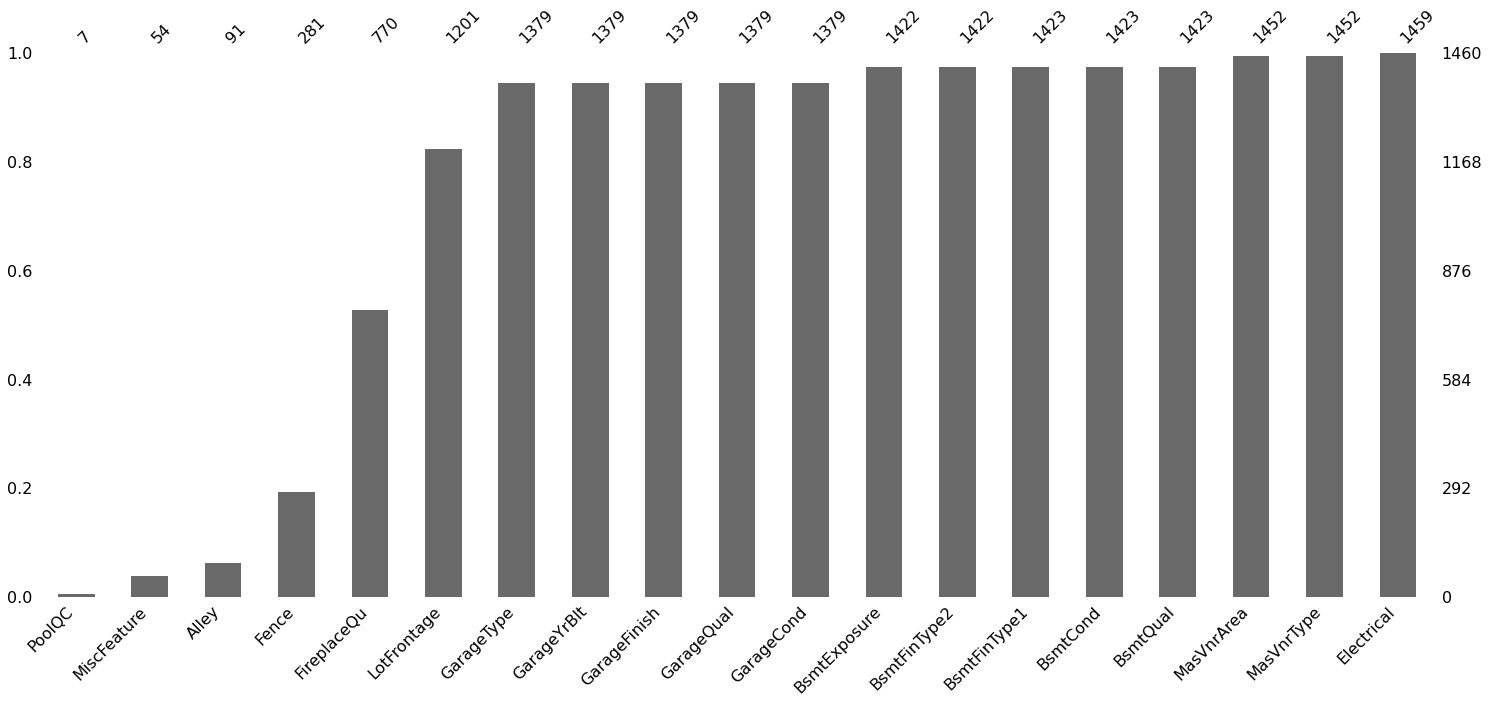

In [41]:
#!pip install missingno
import missingno as msno
msno.bar(train_df[null_value_columns])

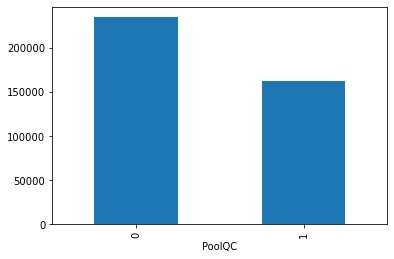

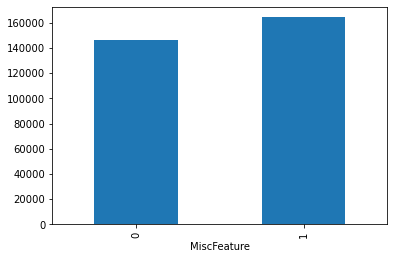

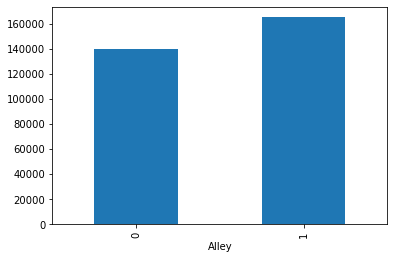

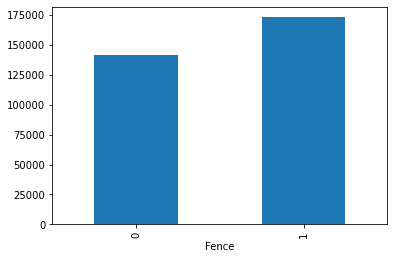

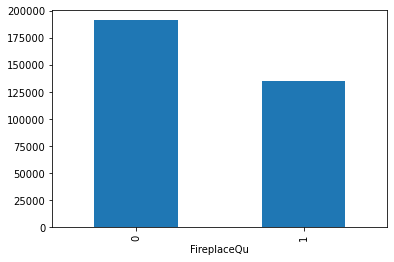

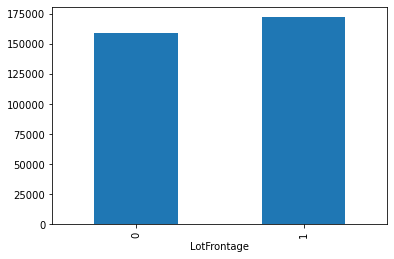

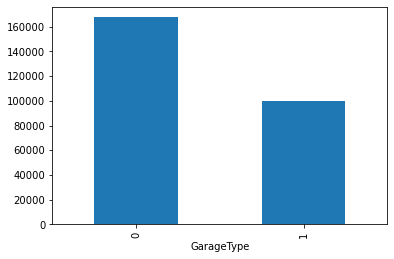

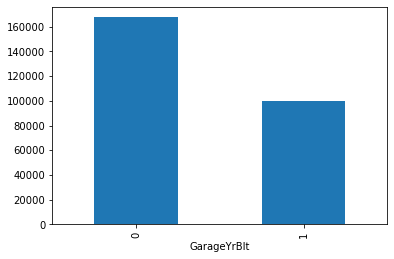

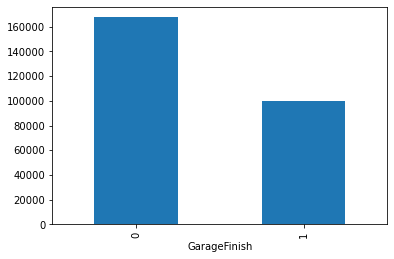

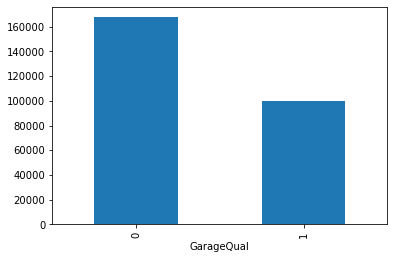

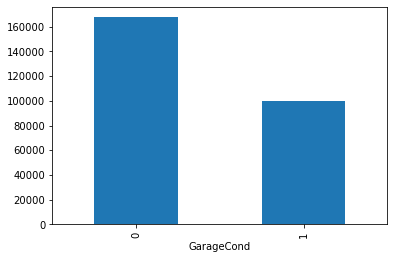

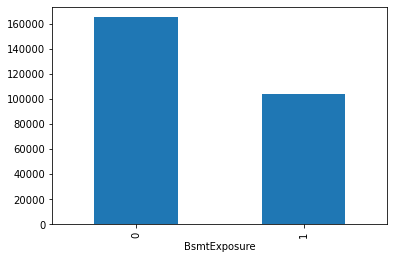

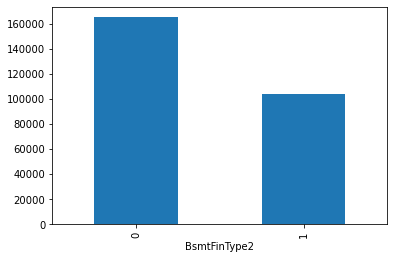

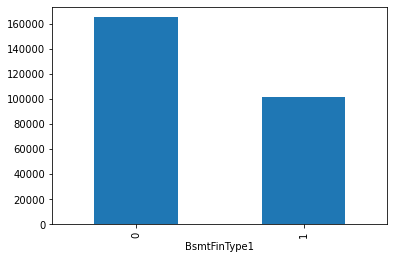

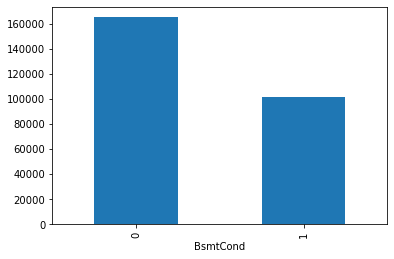

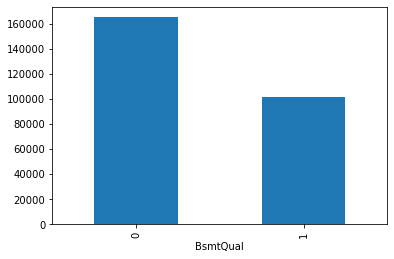

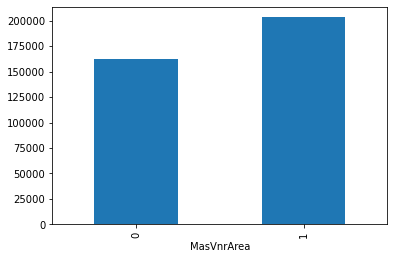

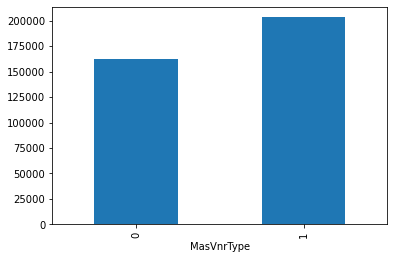

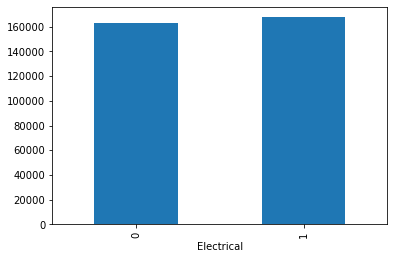

In [42]:
data = train_df.copy()
for feature in null_value_columns:
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['SalePrice'].median().plot(kind = 'bar')
    plt.show()

In [59]:
# Finding number of unique values in dataset
for i in train_df.columns:
  print(i, train_df[i].nunique())

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscV

In [20]:
# find null values column list
#null_value_columns = null_df["index"].values.tolist()

In [38]:
# Creating list of null values with sales
#null_value_columns_sales = null_value_columns + ["SalePrice"]
#null_value_columns_sales

In [39]:
# check correlation with sales price
#train_df[null_value_columns_sales].corr()

In [23]:
# creating variable
#var_list = null_value_columns

In [45]:
# Function to separate null variables as categorical and quantitative
null_obj_list = []
null_quant_list = []
def separator(data):
  if train_df[data].dtype == "object":
    null_obj_list.append(data)
  else:
    null_quant_list.append(data)
  return null_obj_list, null_quant_list

In [49]:
# Calling separator function
len_var_list = len(null_value_columns)
for i in range(len_var_list):
  separator(null_value_columns[i])
  

In [50]:
# print list of null values
print("objects: ", null_obj_list)
print("Quants : ",null_quant_list )

objects:  ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
Quants :  ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


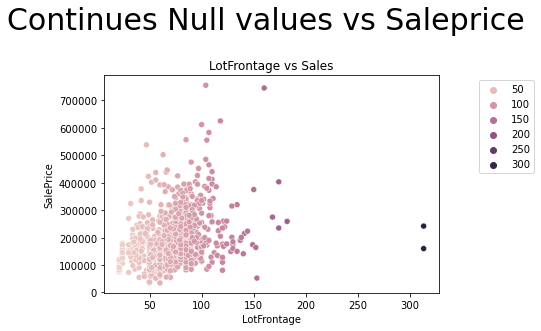

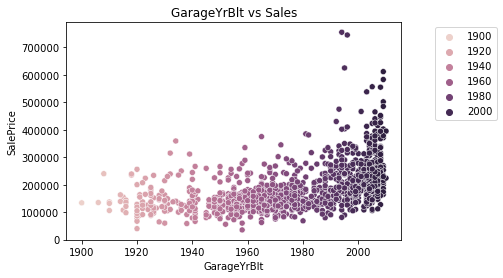

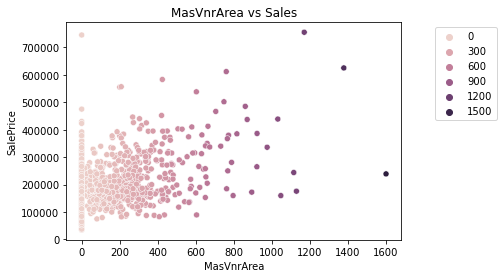

In [51]:
# Creating scatter plots for continues null values
plt.suptitle("Continues Null values vs Saleprice", fontsize = 30, y = 1.12)

for feature in null_quant_list:

    data = train_df.copy()
    sns.scatterplot(data = train_df, y =  "SalePrice", x =  feature, hue = feature)
    plt.legend(bbox_to_anchor = (1.3, 1))
    plt.title(feature + " vs Sales")
    #plt.savefig(feature+".png")  #for downloading pictures in colab
    #files.download(feature+".png")
    plt.show()
    print("")
  



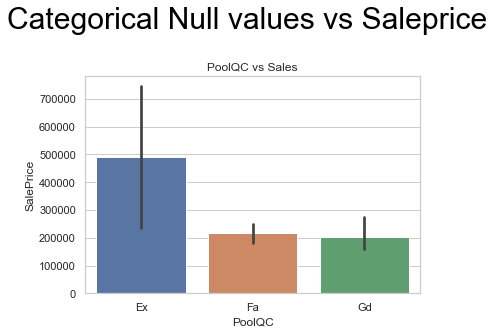

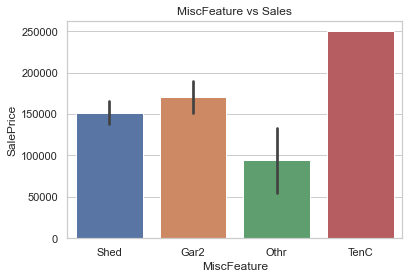

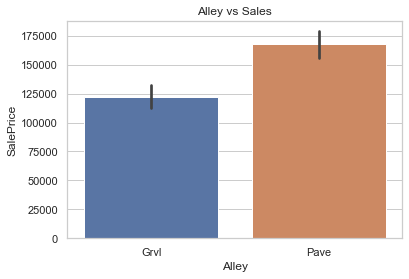

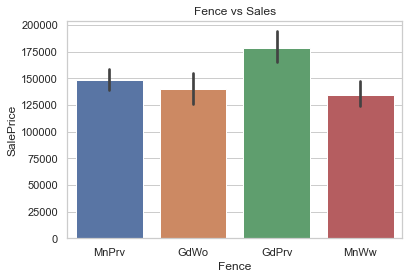

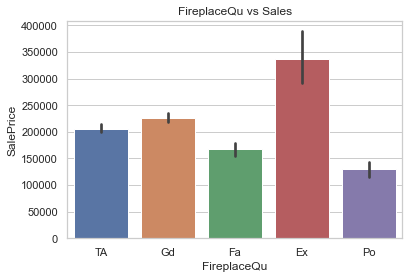

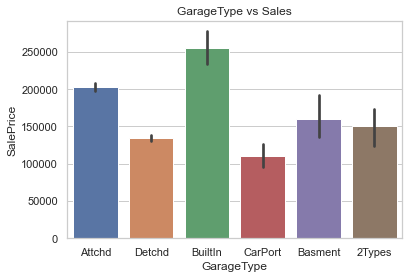

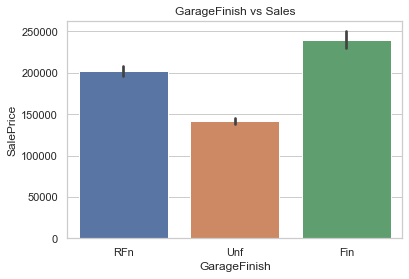

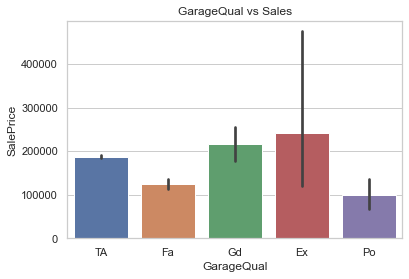

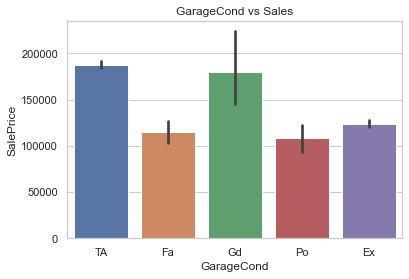

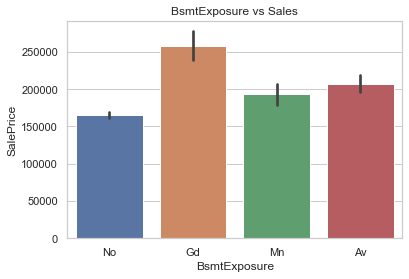

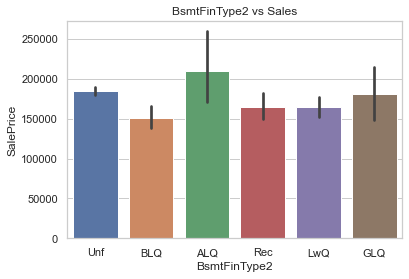

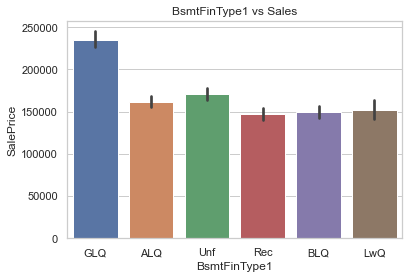

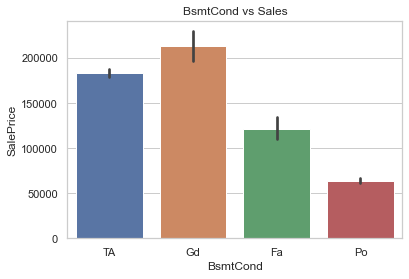

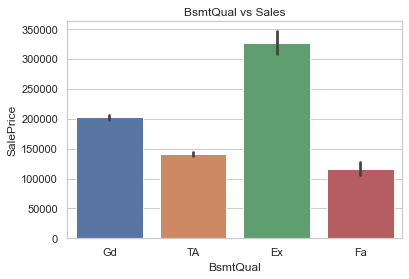

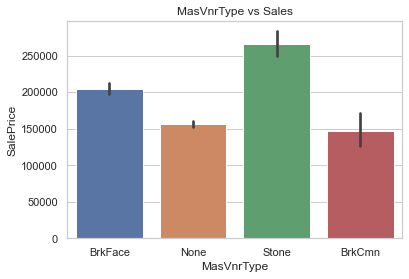

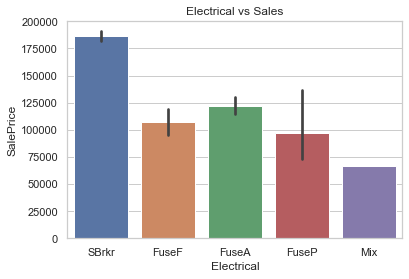

In [52]:
# Creating bar plots for categorical null values
plt.suptitle("Categorical Null values vs Saleprice", fontsize = 30, y = 1.12)
sns.set(style = "whitegrid")
for feature in null_obj_list:
  sns.barplot(data = train_df, y =  "SalePrice", x =  feature)
  plt.title(feature + " vs Sales")
  #plt.savefig(feature+".png")  #for downloading pictures in colab
  #files.download(feature+".png")
  plt.show()
  print("")

#### year_variables

In [61]:
# Sepearating year features 
year_variables = [i for i in train_df.columns if "Yr" in i or "Year" in i]
print("Number of year features: ",len(year_variables))
train_df[year_variables].head()

Number of year features:  4


YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

<Figure size 432x288 with 0 Axes>

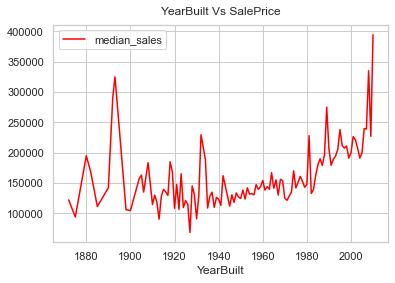

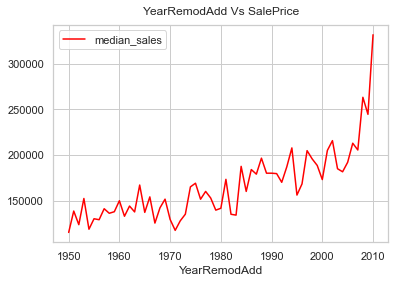

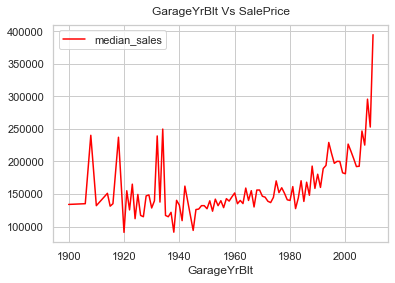

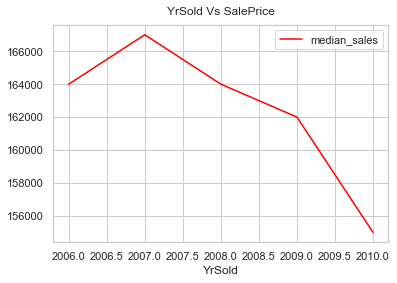

In [62]:

#
plt.suptitle("Year Features Vs Sales",y = 1.2, fontsize = 30)
for feature in year_variables:
  df = data.groupby(feature).agg(median_sales = ("SalePrice", "median"))
  df.plot(color = "red")
  plt.title(feature + " Vs SalePrice", pad = 10)
  print("")
  plt.show()

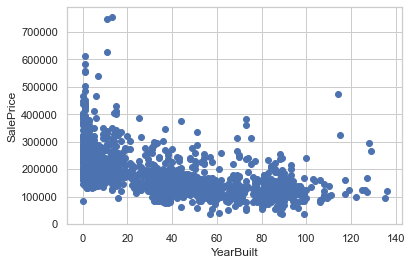

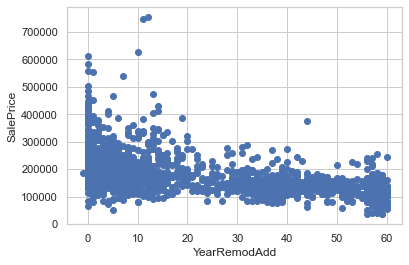

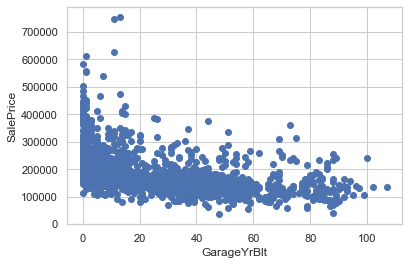

In [66]:
# difference in years
for feature in year_variables:
    
    if feature != "YrSold":
        data = train_df.copy()
        data[feature] = data["YrSold"]-data[feature]
        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

#### continues variable

In [68]:
#Separating continues variables
cont_variables = [i for i in train_df.columns if i not in cat_variables and i not in year_variables]

In [71]:
# find ordinal data from numerical data
discrete_variables = [i for i in cont_variables if train_df[i].nunique() < 25]
print("number of discrete_variables", len(discrete_variables))
train_df[discrete_variables].head()
  

number of discrete_variables 17


MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

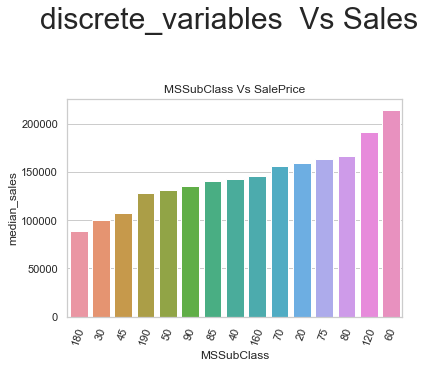

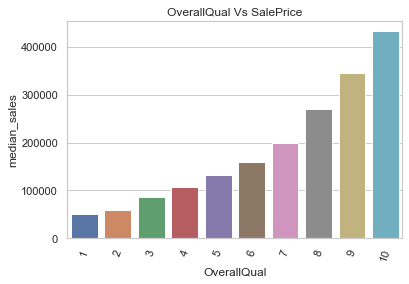

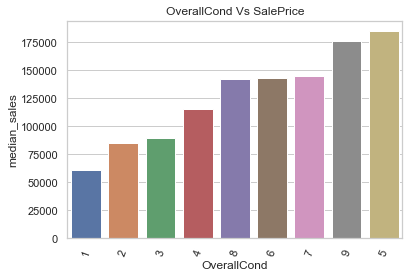

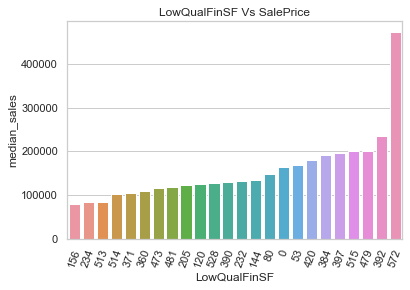

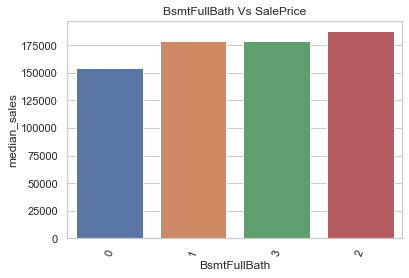

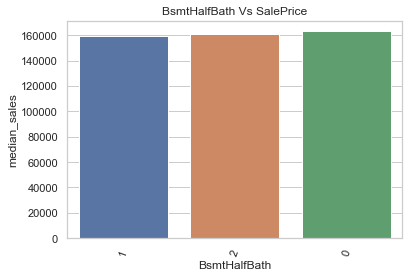

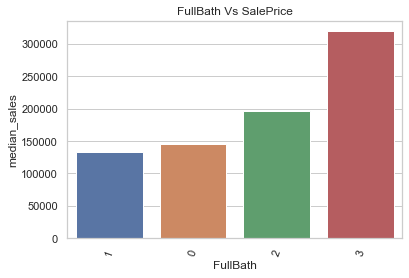

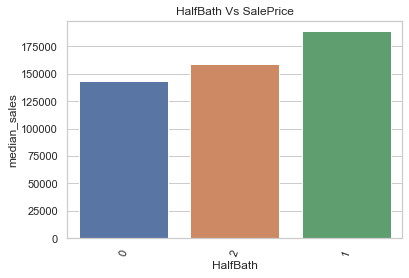

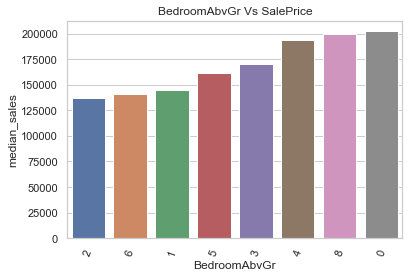

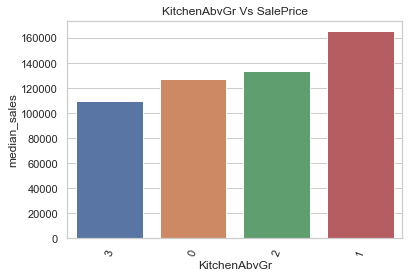

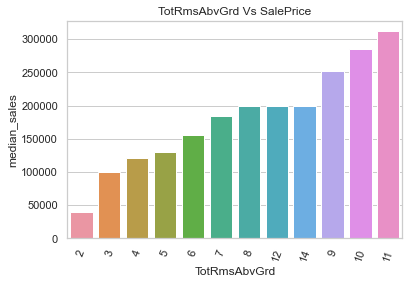

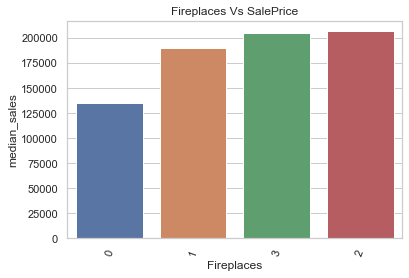

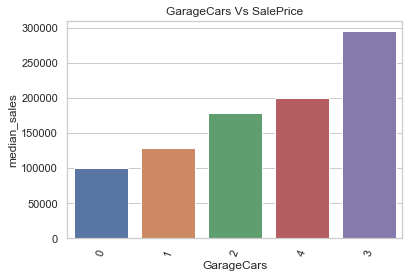

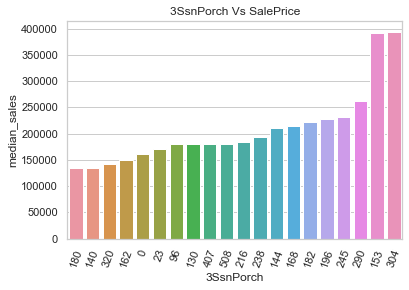

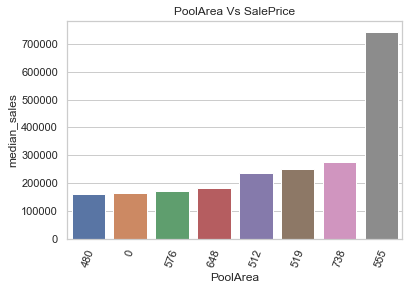

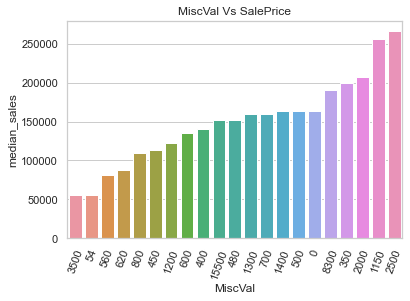

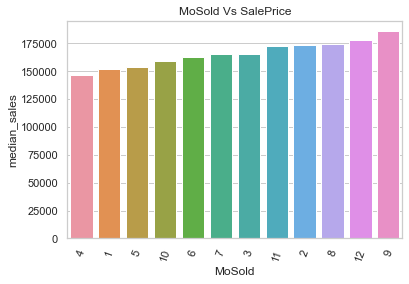

In [73]:

# Creating charts for discrete_variables 
plt.suptitle("discrete_variables  Vs Sales",y = 1.2, fontsize = 30)

#
data = train_df.copy()
for feature in discrete_variables:
  df = data.groupby(feature).agg(median_sales = ("SalePrice", "median"))
  df = df.reset_index().sort_values("median_sales")
  sns.barplot(data = df, x = feature, y = "median_sales", order= df[feature])
  plt.title(feature + " Vs SalePrice")
  plt.xticks(rotation = 70)
  print("")
  plt.show()


In [77]:
#updating continues variables
cont_variables = [i for i in cont_variables if i not in discrete_variables+["Id"]]
print("Length of continues variables", len(cont_variables))
train_df[cont_variables].head()

Length of continues variables 16


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

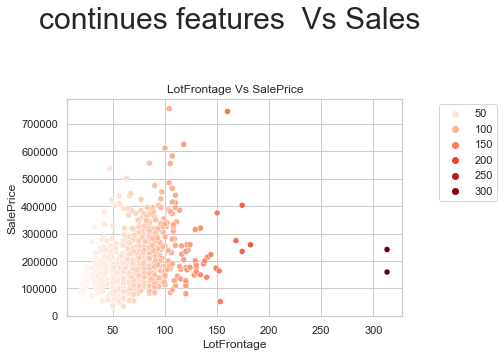

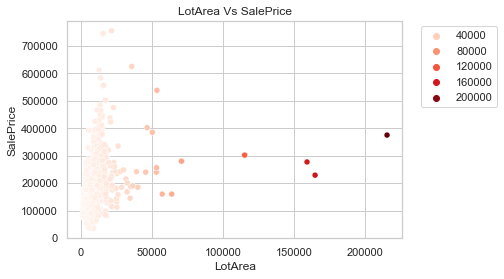

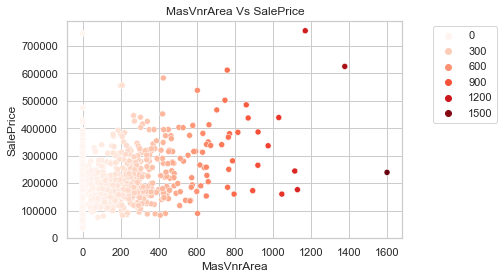

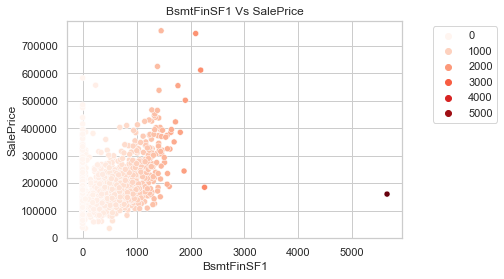

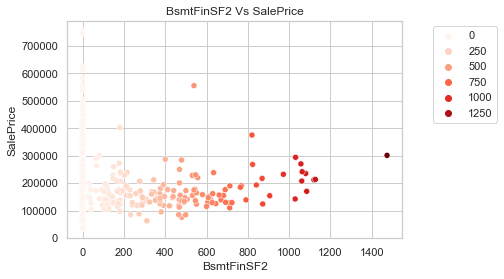

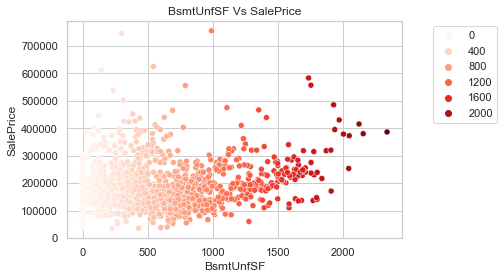

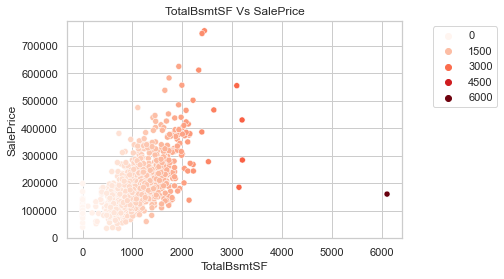

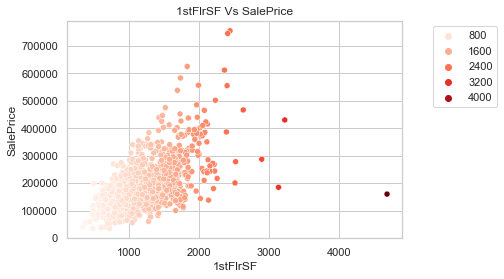

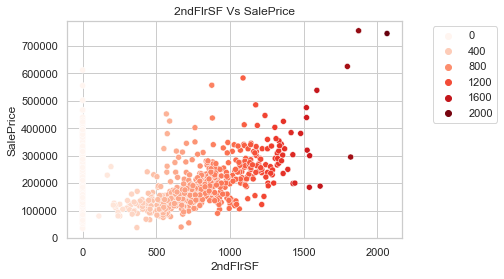

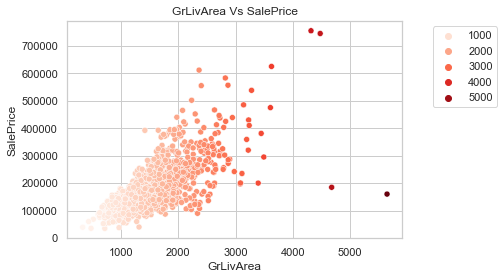

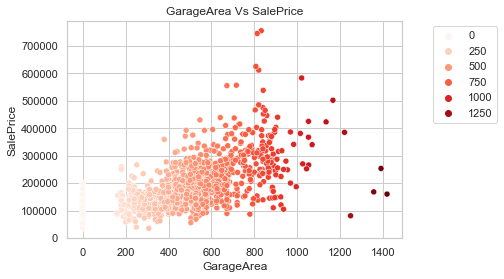

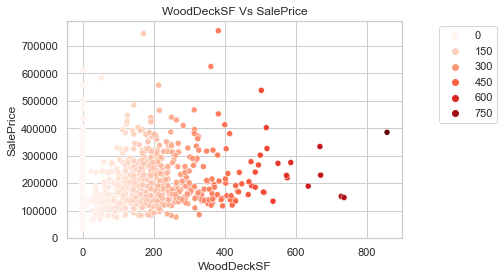

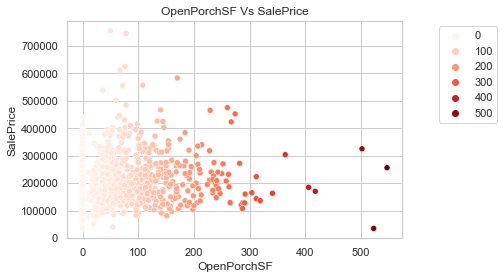

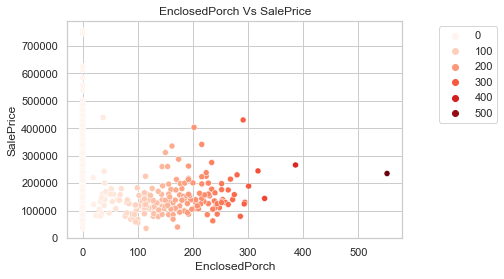

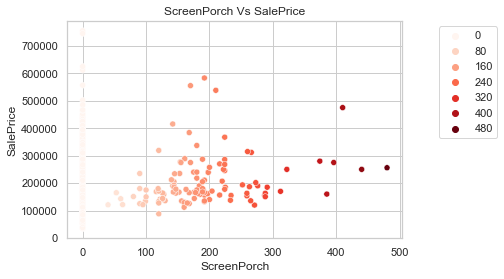

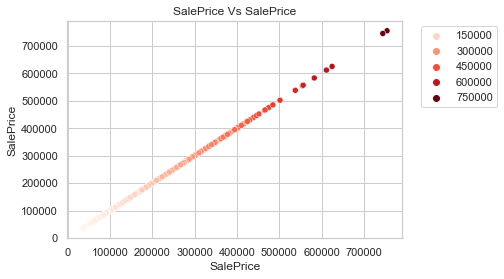

In [78]:

# Creating charts for continues features
plt.suptitle("continues features  Vs Sales",y = 1.2, fontsize = 30)

#
data = train_df.copy()
for feature in cont_variables:
  sns.scatterplot(data = data , x = feature, y = "SalePrice", hue = feature, palette= "Reds" )
  plt.title(feature + " Vs SalePrice")
  plt.legend(bbox_to_anchor = (1.3, 1))
  #plt.xticks(rotation = 70)
  print("")
  plt.show()

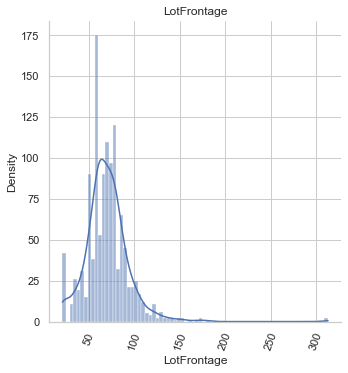

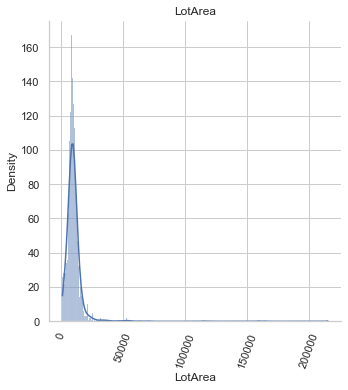

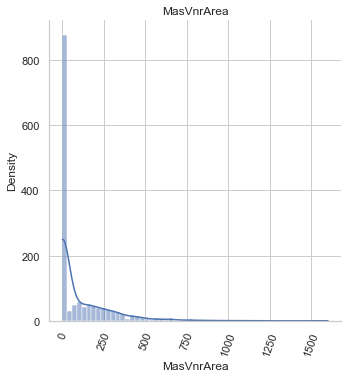

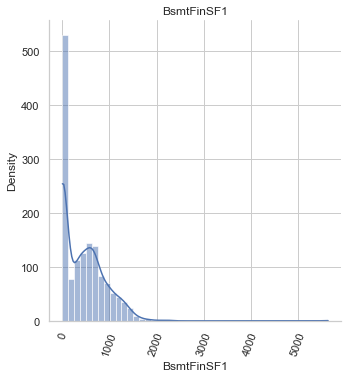

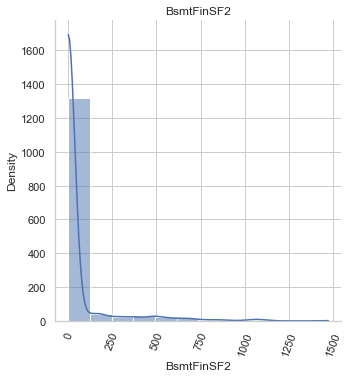

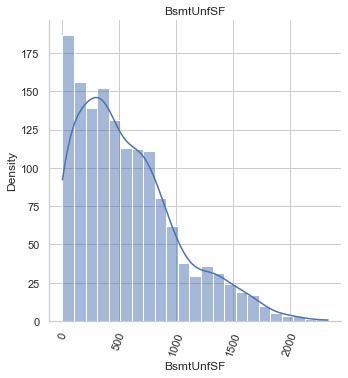

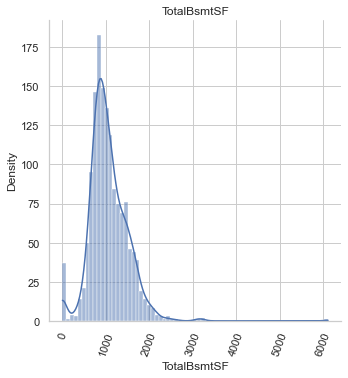

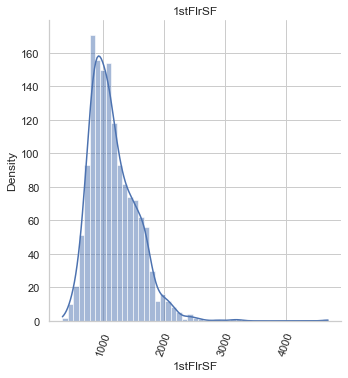

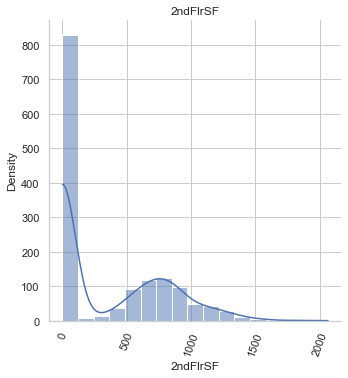

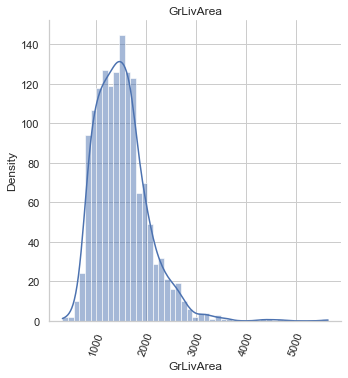

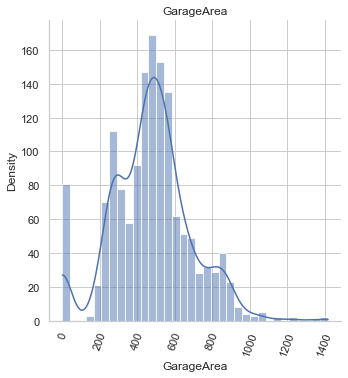

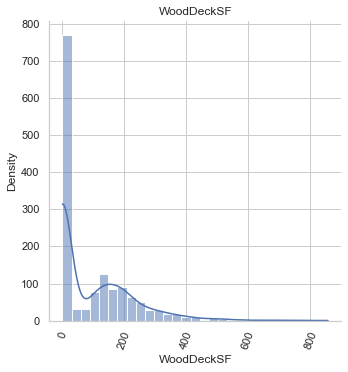

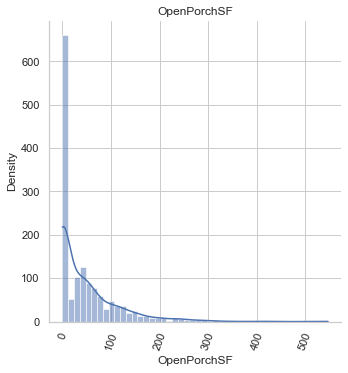

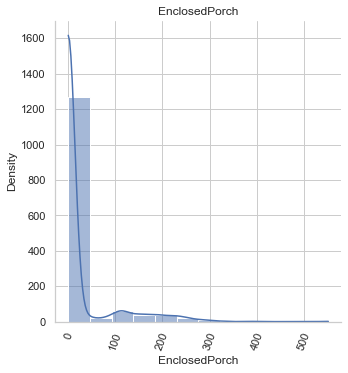

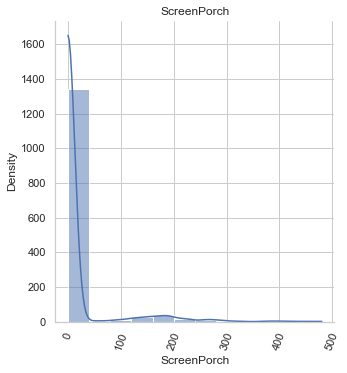

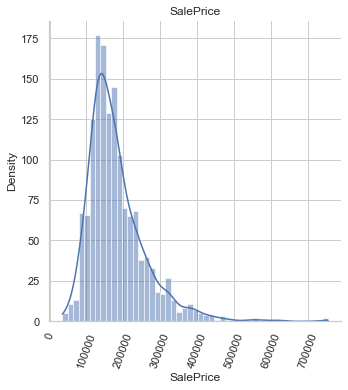

In [79]:
# Checking distribution of continues variabls

for i in cont_variables:
  sns.displot(train_df[i], kde = True)
  plt.ylabel("Density")
  plt.xticks(rotation = 70)
  plt.title(i)
  print("")
  plt.show()

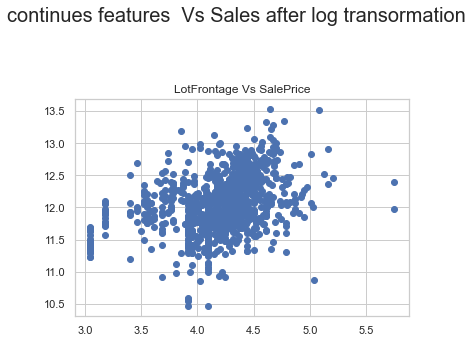

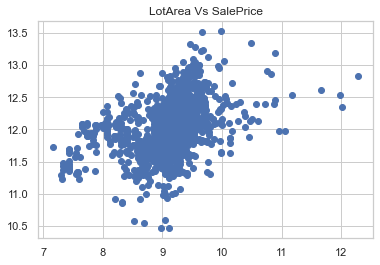

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


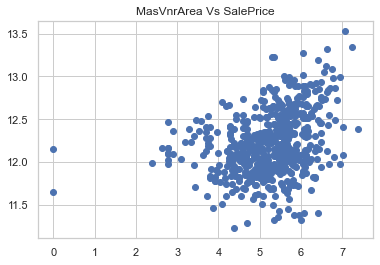

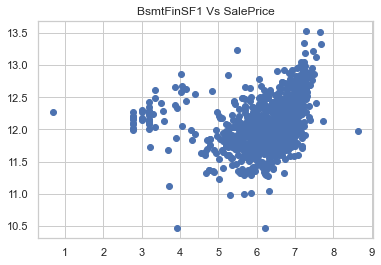

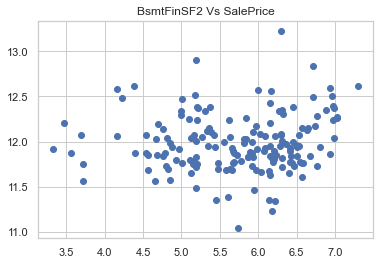

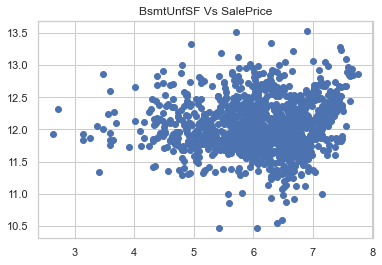

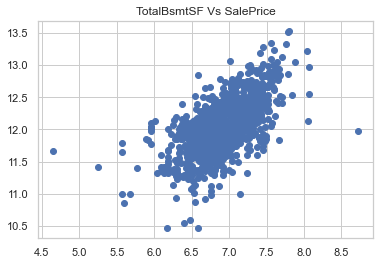

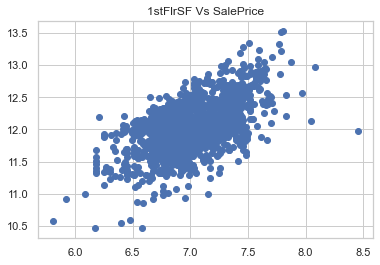

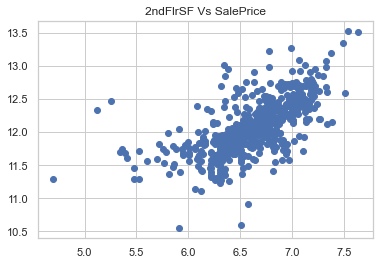

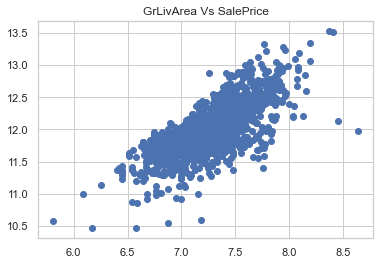

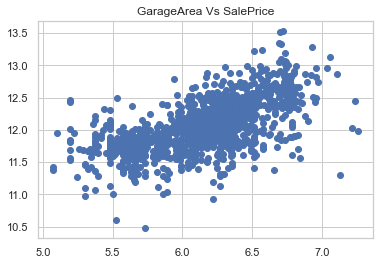

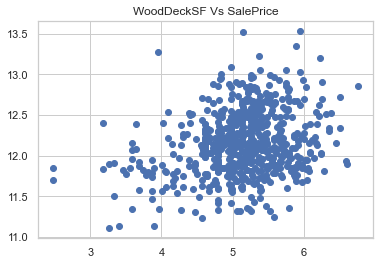

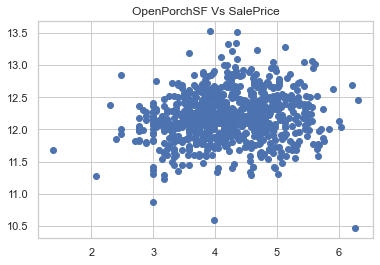

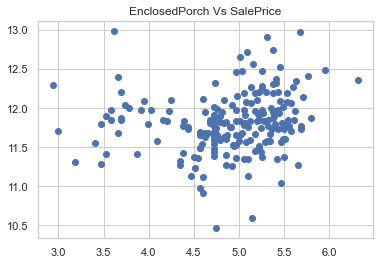

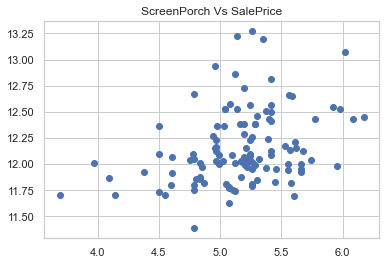

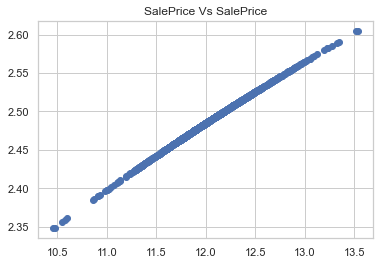

In [103]:
# Creating charts for continues features
plt.suptitle("continues features  Vs Sales after log transormation",y = 1.2, fontsize = 20)

#

for feature in cont_variables:
    data = train_df.copy()
    try:
        data[feature] = np.log(data[feature])
        data["Saleprice"] = np.log(data["SalePrice"])
        plt.scatter(data[feature], data["Saleprice"])
        plt.title(feature + " Vs SalePrice")
        #plt.legend(bbox_to_anchor = (1.3, 1))
        #plt.xticks(rotation = 70)
        print("")
        plt.show()
    except:
        pass

C:\Users\cm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


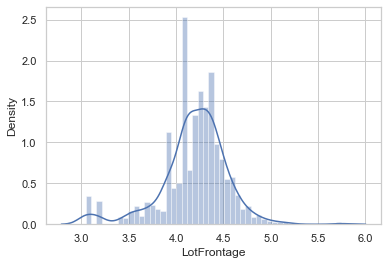

C:\Users\cm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


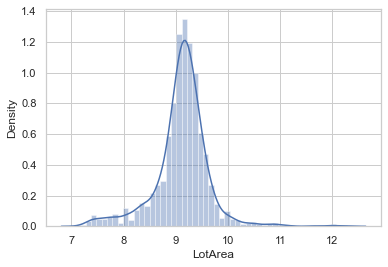

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


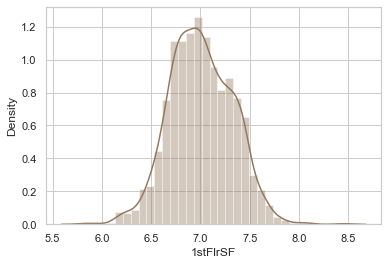

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


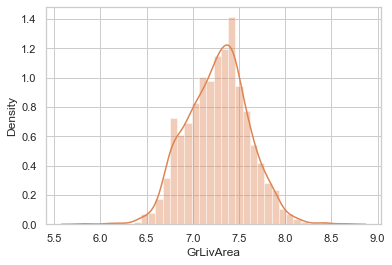

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


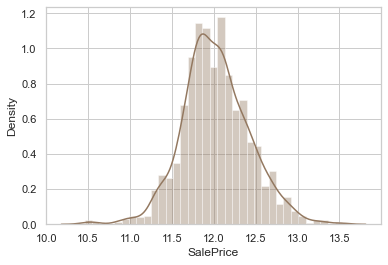

In [81]:
#Log transformation of skewed data
#using try and except becuse of Nan values in log transformed
data = train_df.copy()
for i in cont_variables:
  try:
    data[i] = np.log(data[i])
    sns.distplot(data[i])
    plt.show()
  except:
    pass

Outliers

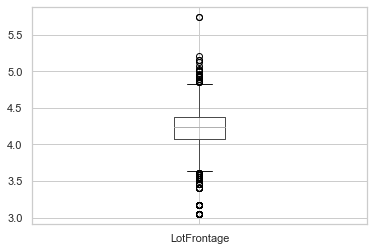

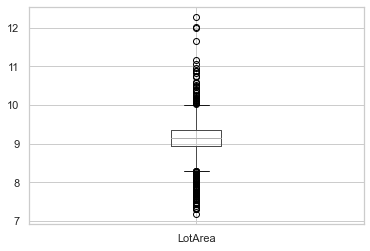

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


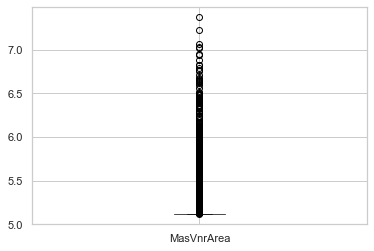

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


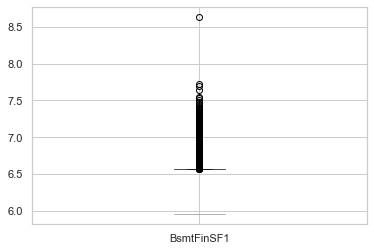

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


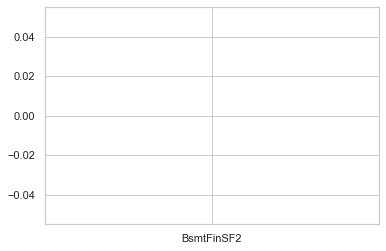

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


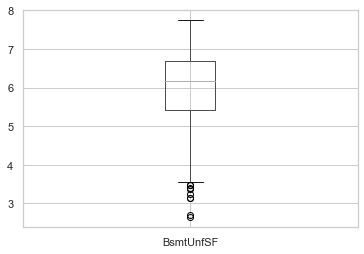

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


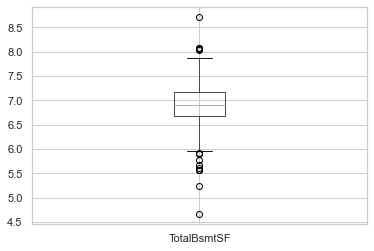

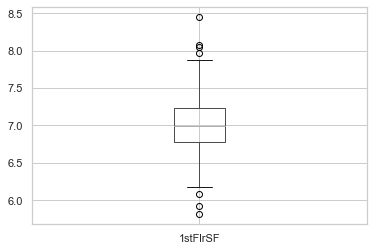

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


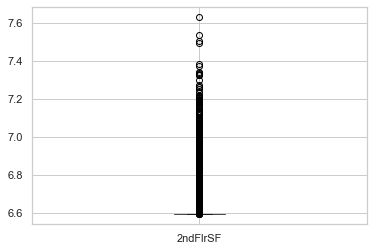

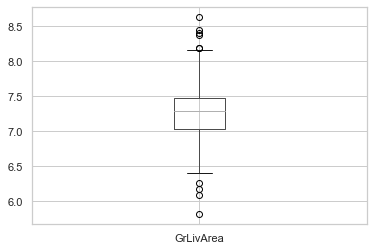

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


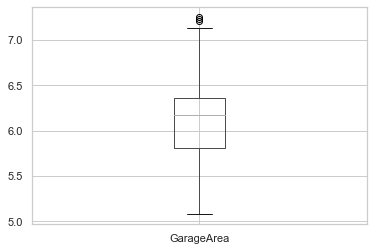

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


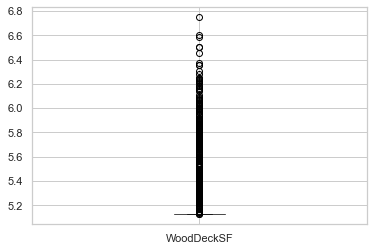

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


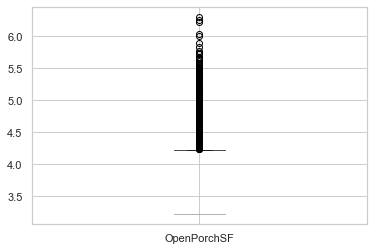

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


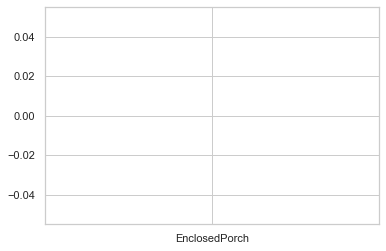

C:\Users\cm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\cm\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\cm\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


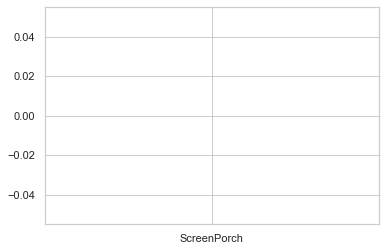

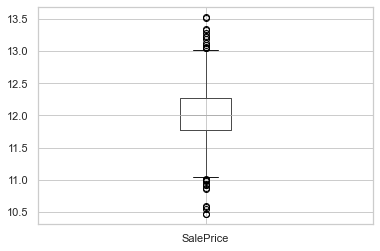

In [104]:

#box plots for coninues data
for feature in cont_variables:
    data = train_df.copy()
    try:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.show()
        print("")
        plt.show()
    except:
        pass


In [107]:
"""data = train_df.copy()

for i in cont_variables:
  if 0 in data[i].unique():
    pass
  else:
    data[i] = np.log(data[i])
    data.boxplot(column = i)
    plt.show()"""

'data = train_df.copy()\n\nfor i in cont_variables:\n  if 0 in data[i].unique():\n    pass\n  else:\n    data[i] = np.log(data[i])\n    data.boxplot(column = i)\n    plt.show()'

Handling skewed data [https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45]

### Categorical variables

In [101]:
# Separating All Categorical Varibles
cat_variables = train_df.select_dtypes("O").columns
print("Number of catergorical variables", len(cat_variables))
train_df[cat_variables].head()

Number of catergorical variables 43


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [109]:
len(cat_variables)

43

In [110]:
# unique values in cat variable
data = train_df.copy()
for feature in cat_variables:
    print(feature, ":", data[feature].nunique())

MSZoning : 5
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
FireplaceQu : 5
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
PoolQC : 3
Fence : 4
MiscFeature : 4
SaleType : 9
SaleCondition : 6


<Figure size 432x288 with 0 Axes>

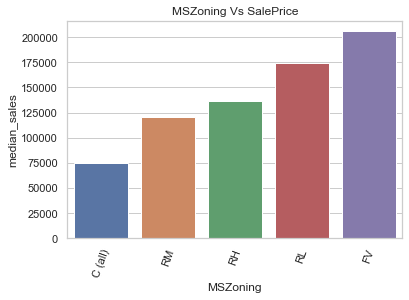

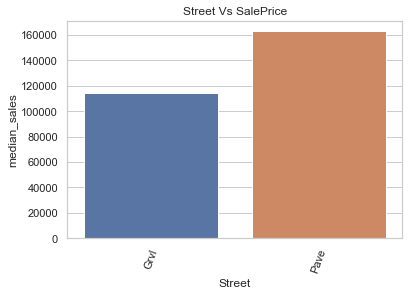

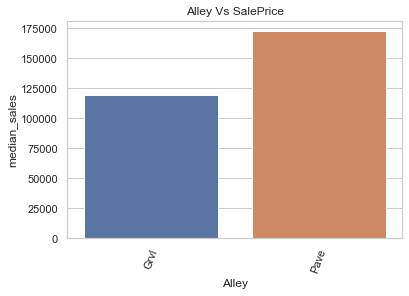

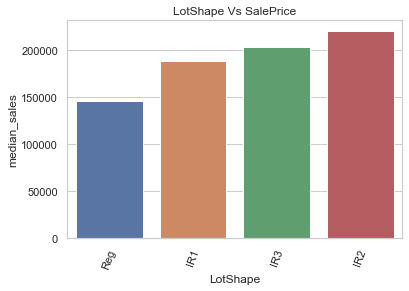

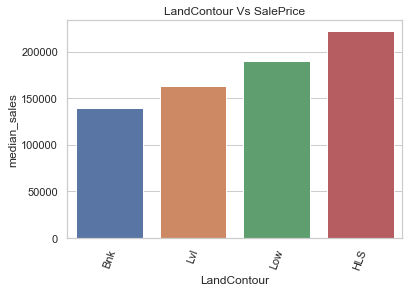

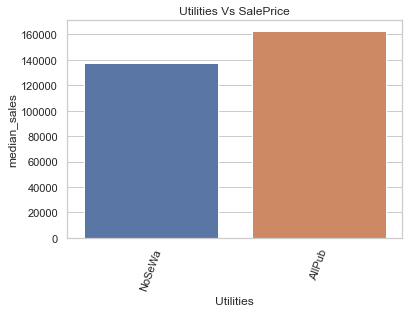

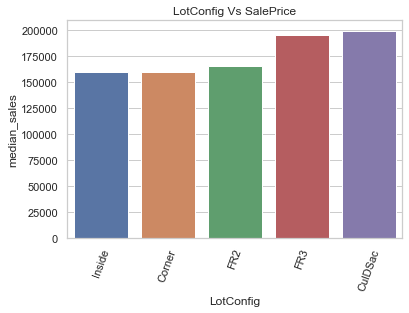

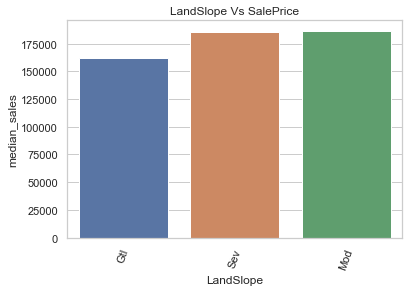

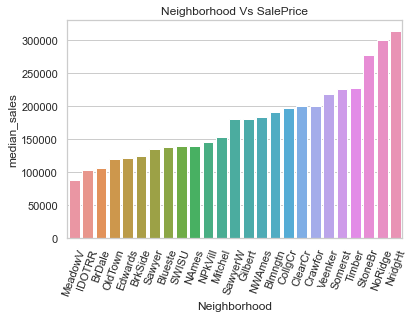

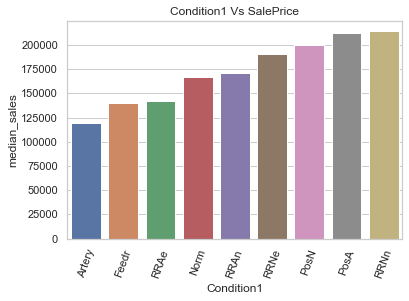

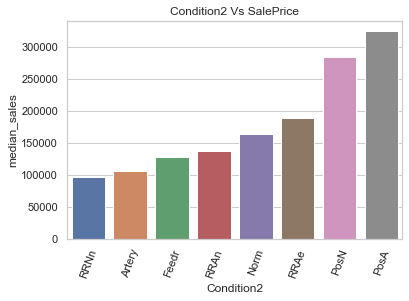

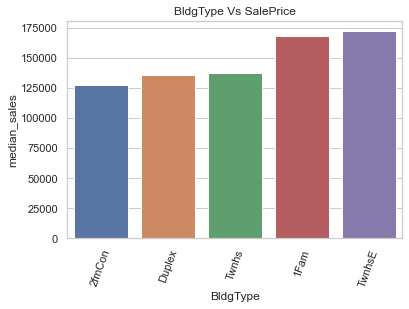

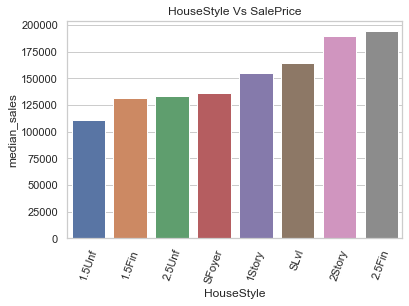

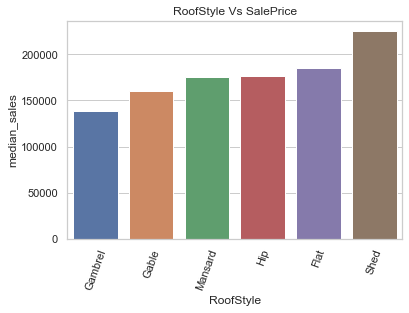

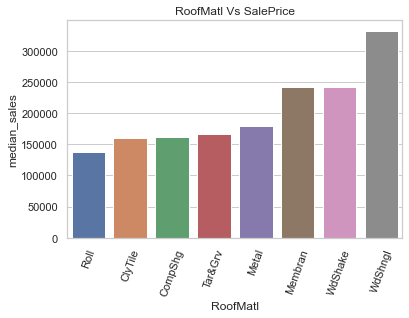

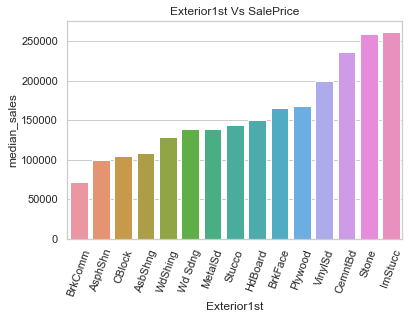

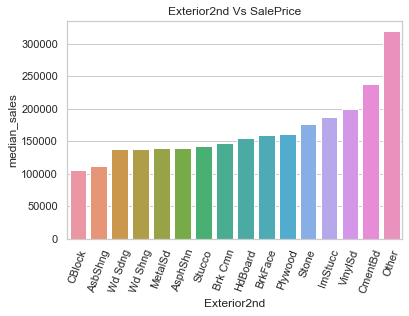

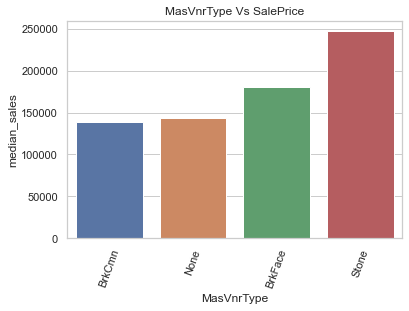

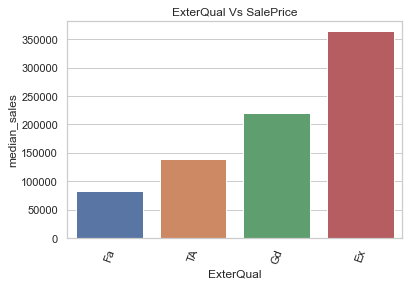

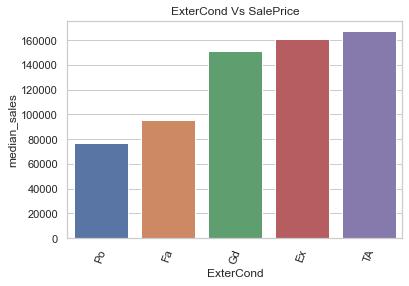

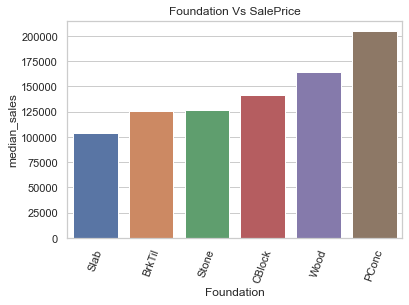

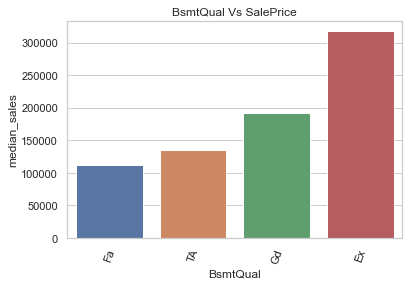

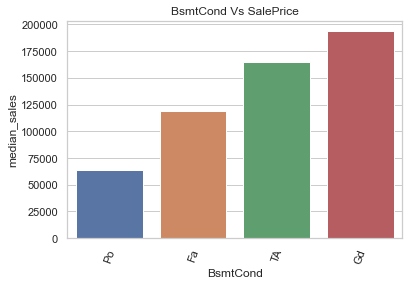

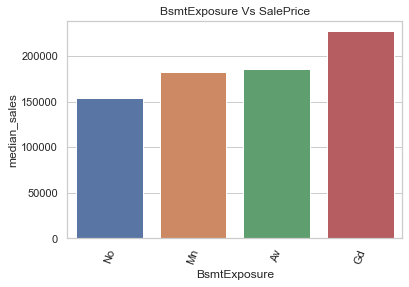

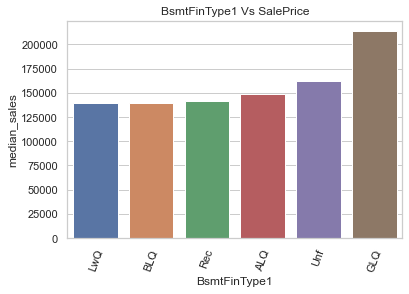

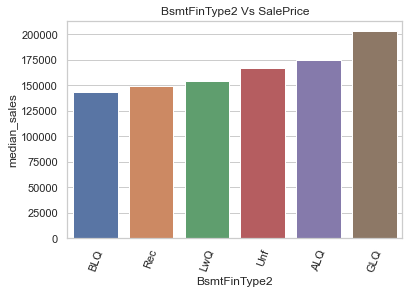

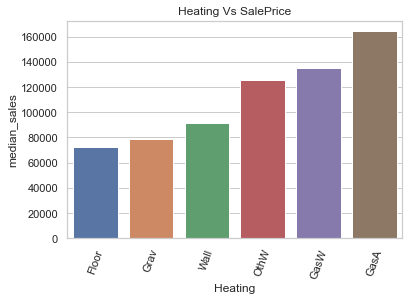

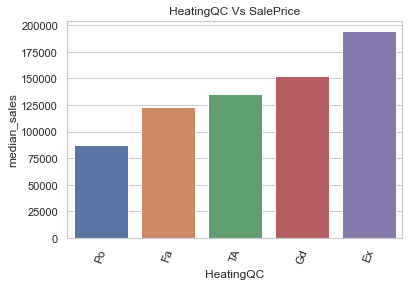

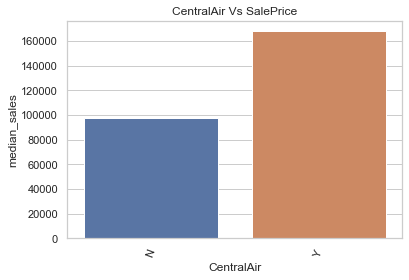

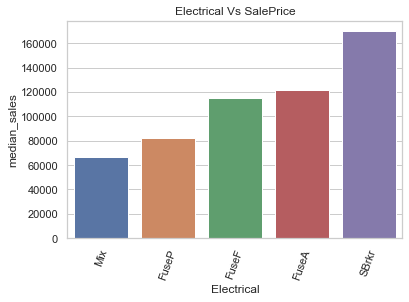

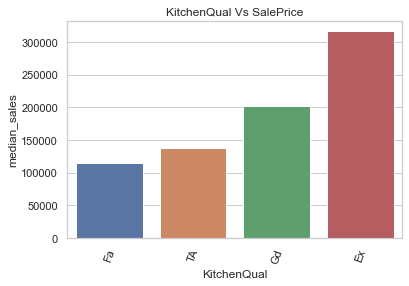

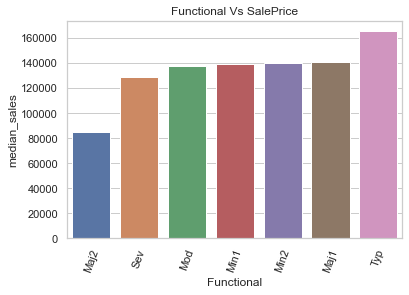

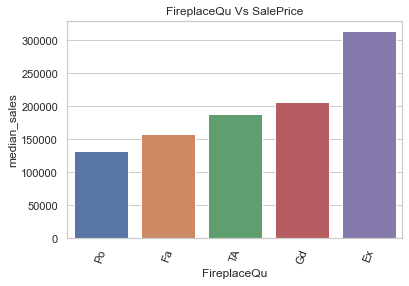

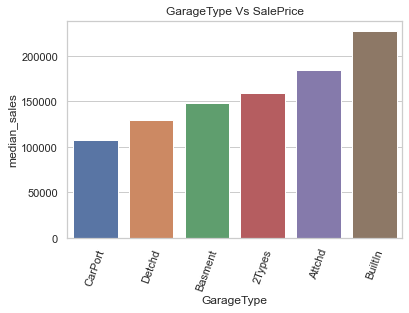

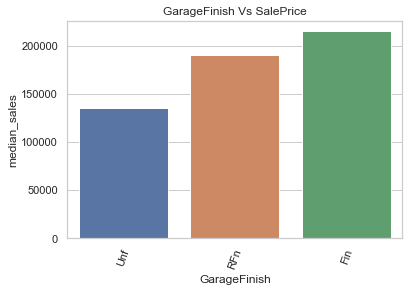

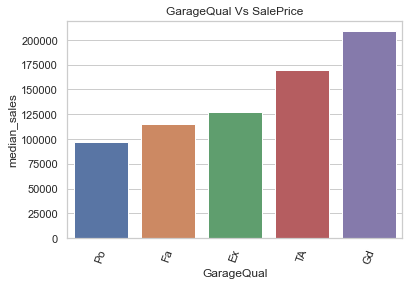

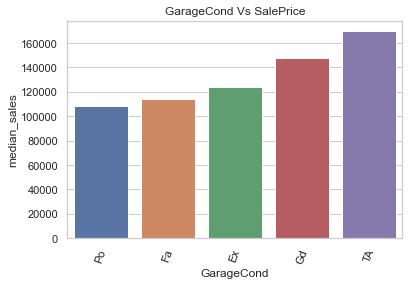

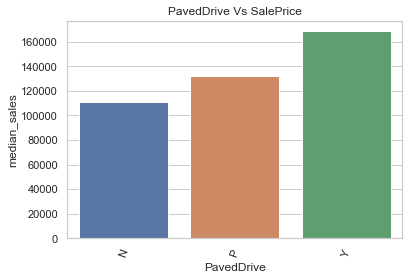

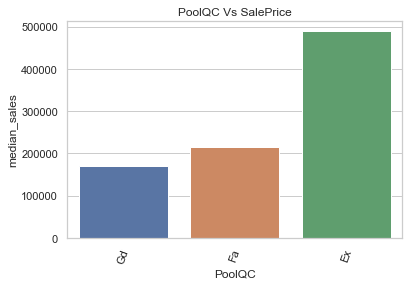

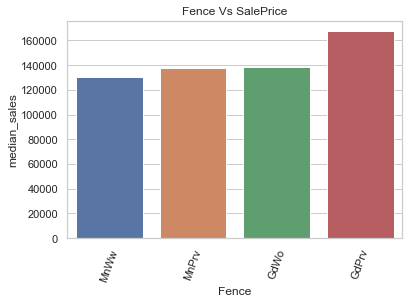

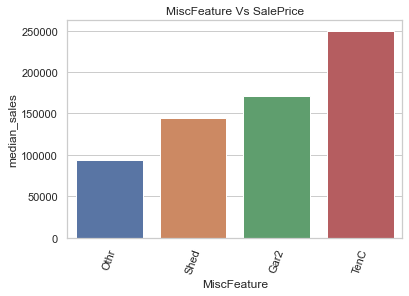

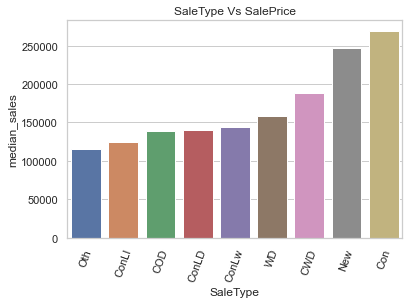

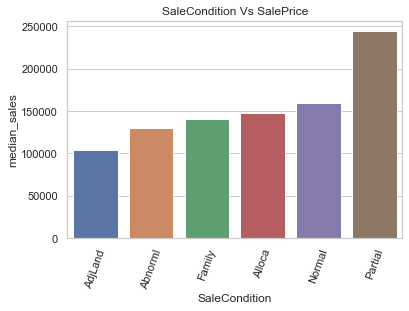

In [108]:

# Creating charts for categorical Variables
data = train_df.copy()
plt.suptitle("Categorical Variables Vs Sales",y = 1.2, fontsize = 30)

#
for feature in cat_variables:
  plt.figure(figsize= (6, 4))
  df = data.groupby(feature).agg(median_sales = ('SalePrice', "median"))
  df  = df.reset_index().sort_values("median_sales")
  sns.barplot(data = df, x = feature, y = "median_sales")
  plt.title(feature + " Vs SalePrice")
  plt.xticks(rotation = 70)
  print("")
  plt.show()

## Feature Engineering

### **Imputing Missing Values**

In [30]:
#droping null columns with more than 50 % null values
null_greater_50 = [feature for feature in null_value_columns if (train_df[feature].isnull().mean()*100) > 50]
null_greater_50


['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [31]:
#drop 'PoolQC', 'MiscFeature', 'Alley', 'Fence'
train_df.drop(columns= null_greater_50, inplace= True)

Null_obj_column, and quant columns updated

In [32]:
null_value_columns = [i for i in null_value_columns if i not in null_greater_50]
null_value_columns

['FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [33]:
null_obj_list = [i for i in null_value_columns if train_df[i].dtype == 'O']

In [34]:
null_quant_list = [i for i in null_value_columns if i not in null_obj_list]

In [35]:
# Creating dictionary for mode values of categorical variables
mode_dict = {}
l = len(null_obj_list)
for i in range(l):
  mode_dict[null_obj_list[i]] = train_df[null_obj_list[i]].value_counts().idxmax()
print(mode_dict)

{'FireplaceQu': 'Gd', 'GarageType': 'Attchd', 'GarageFinish': 'Unf', 'GarageQual': 'TA', 'GarageCond': 'TA', 'BsmtFinType2': 'Unf', 'BsmtExposure': 'No', 'BsmtFinType1': 'Unf', 'BsmtCond': 'TA', 'BsmtQual': 'TA', 'MasVnrType': 'None', 'Electrical': 'SBrkr'}


In [36]:
#Creating list of keys from mode dictionary
null_obj_keys = list(mode_dict.keys())
null_obj_keys

['FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical']

In [37]:
# Function to automatically fill obj null values
def imputation(data):
  train_df[data].replace(np.nan, mode_dict[data], inplace = True)
  return train_df[data].isnull().sum()


In [38]:
# calling function imputation
l = len(null_obj_keys)
for i in range(l):
  print(imputation(null_obj_keys[i]))

0
0
0
0
0
0
0
0
0
0
0
0


In [39]:
# Creating dictionary for mean values of quant variables
mean_dict = {}
l = len(null_quant_list)
for i in range(l):
  mean_dict[null_quant_list[i]] = train_df[null_quant_list[i]].mean()
print(mean_dict)

{'LotFrontage': 70.04995836802665, 'GarageYrBlt': 1978.5061638868744, 'MasVnrArea': 103.68526170798899}


In [40]:
# Function to automatically fill continues null values
def imputation(data):
  train_df[data].replace(np.nan, mean_dict[data], inplace = True)
  return train_df[data].isnull().sum()


In [41]:
# Creating key list from mean dictionary

null_quant_keys = list(mean_dict.keys())
null_quant_keys

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [42]:

# Calling imputation function

l = len(null_quant_keys)
for i in range(l):
  print(imputation(null_quant_keys[i]))

0
0
0


In [43]:
# Checkin null values again
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

In [115]:
test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          20       RH         80.0    11622      Reg         Lvl    Inside   
1          20       RL         81.0    14267      IR1         Lvl    Corner   
2          60       RL         74.0    13830      IR1         Lvl    Inside   
3          60       RL         78.0     9978      IR1         Lvl    Inside   
4         120       RL         43.0     5005      IR1         HLS    Inside   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0        NAmes      Feedr       Norm     1Fam     1Story            5   
1        NAmes       Norm       Norm     1Fam     1Story            6   
2      Gilbert       Norm       Norm     1Fam     2Story            5   
3      Gilbert       Norm       Norm     1Fam     2Story            6   
4      StoneBr       Norm       Norm   TwnhsE     1Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            6       1961          1961     Gable  CompShg     VinylSd   
1            6       1958          1958       Hip  CompShg     Wd Sdng   
2            5       1997          1998     Gable  CompShg     VinylSd   
3            6       1998          1998     Gable  CompShg     VinylSd   
4            5       1992          1992     Gable  CompShg     HdBoard   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd       None         0.0        TA        TA     CBlock       TA   
1     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA   
2     VinylSd       None         0.0        TA        TA      PConc       Gd   
3     VinylSd    BrkFace        20.0        TA        TA      PConc       TA   
4     HdBoard       None         0.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       TA           No          Rec       468.0      270.0        882.0   
1       TA           No          ALQ       923.0      406.0       1329.0   
2       TA           No          GLQ       791.0      137.0        928.0   
3       TA           No          GLQ       602.0      324.0        926.0   
4       TA           No          ALQ       263.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        TA          Y      SBrkr       896         0        896   
1    GasA        TA          Y      SBrkr      1329         0       1329   
2    GasA        Gd          Y      SBrkr       928       701       1629   
3    GasA        Ex          Y      SBrkr       926       678       1604   
4    GasA        Ex          Y      SBrkr      1280         0       1280   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         1         1             3             1          Gd   
2           0.0         2         1             3             1          TA   
3           0.0         2         1             3             1          Gd   
4           0.0         2         0             2             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0             5        Typ           0          Gd     Attchd       1961.0   
1             6        Typ           0          Gd     Attchd       1958.0   
2             6        Typ           1          TA     Attchd       1997.0   
3             7        Typ           1          Gd     Attchd       1998.0   
4             5        Typ           0          Gd     Attchd       1992.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          Unf         1.0       730.0         TA         TA          Y   
1          Unf         1.0       312.0         TA         TA          Y   
2          Fin         2.0       482.0         TA         TA          Y   
3    

In [116]:
# Finding different type of variables
obj_list= [i for i in test_df.select_dtypes("O").columns]
year_variables = [i for i in test_df.columns if "Yr" in i or "Year" in i]
ordinal_variables = [i for i in test_df.columns if test_df[i].nunique() < 50 and i not in obj_list and i not in year_variables]
quant_list = [i for i in test_df.columns if i not in obj_list and i not in year_variables and i not in ordinal_variables]

In [117]:
# encoding categorical variables
for i in obj_list:
  test_df[i] = pd.get_dummies(test_df[i])

In [118]:
test_df[obj_list].head()

MSZoning  LotShape  LandContour  LotConfig  Neighborhood  Condition1  \
0         0         0            0          0             0           0   
1         0         1            0          1             0           0   
2         0         1            0          0             0           0   
3         0         1            0          0             0           0   
4         0         1            0          0             0           0   

   Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  \
0           0         1           0          0         1            0   
1           0         1           0          0         1            0   
2           0         1           0          0         1            0   
3           0         1           0          0         1            0   
4           0         0           0          0         1            0   

   Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  \
0            0           0          0          0           0         0   
1            0           0          0          0           0         0   
2            0           0          0          0           0         0   
3            0           0          0          0           0         0   
4            0           0          0          0           0         0   

   BsmtCond  BsmtExposure  BsmtFinType1  Heating  HeatingQC  CentralAir  \
0         0             0             0        1          0           0   
1         0             0             1        1          0           0   
2         0             0             0        1          0           0   
3         0             0             0        1          1           0   
4         0             0             1        1          1           0   

   Electrical  KitchenQual  Functional  FireplaceQu  GarageType  GarageFinish  \
0           0            0           0            0           0             0   
1           0            0           0            0           0             0   
2           0            0           0            0           0             1   
3           0            0           0            0           0             1   
4           0            0           0            0           0             0   

   GarageQual  GarageCond  PavedDrive  SaleType  SaleCondition  
0           0           0           0         0              0  
1           0           0           0         0              0  
2           0           0           0         0              0  
3           0           0           0         0              0  
4           0           0           0         0              0

In [119]:
#feature scaling
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

test_df[quant_list] = Scaler.fit_transform(test_df[quant_list])

In [102]:
#### Categorical Variables

##**Stastical Analysis**

Hypothesis  Testing for Continues Variables

-   $H_0:$ continues variables not correlated with SalePrice
-   $H_1:$ continues variables correlated with SalePrice

-   Use α = 0.05

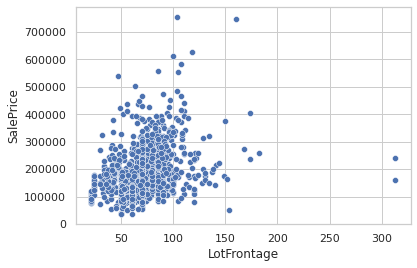

1.3466505607159591e-39


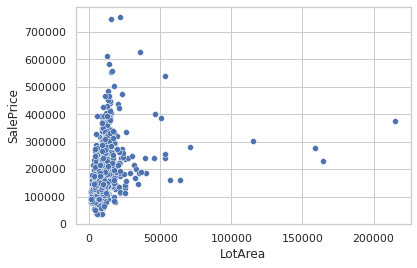

1.123139154919434e-24


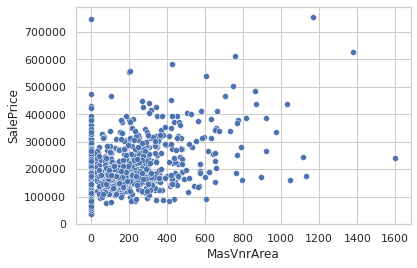

3.9247117417897636e-83


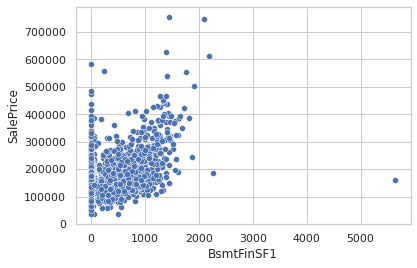

3.3941098292907553e-53


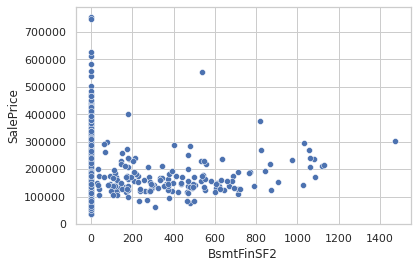

0.663998650834577


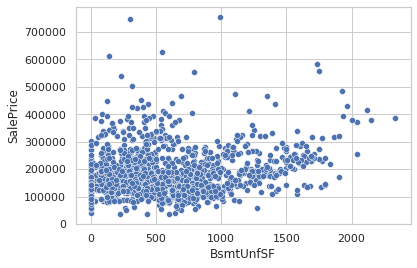

1.1829757963602225e-16


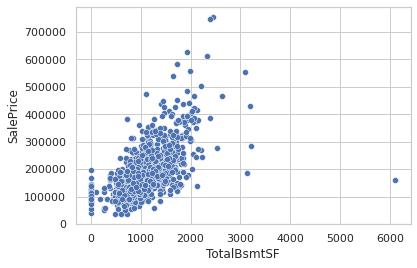

9.484229391507914e-152


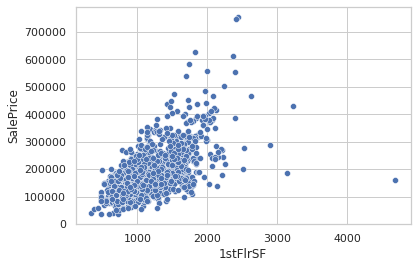

5.394710618971284e-147


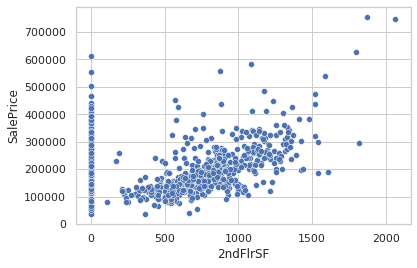

5.764335119183061e-36


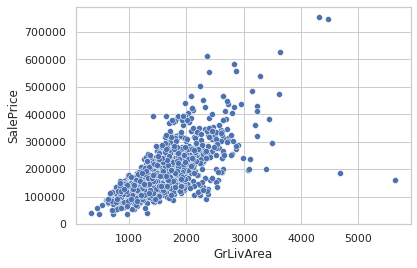

4.518033646779431e-223


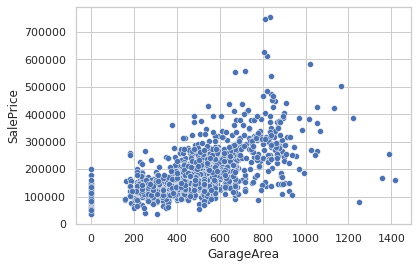

5.2650381679778054e-158


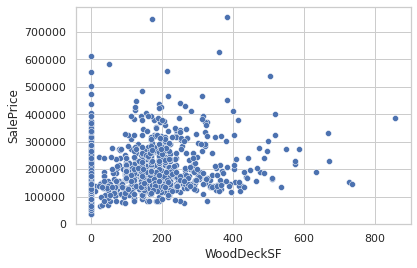

3.972216535629994e-37


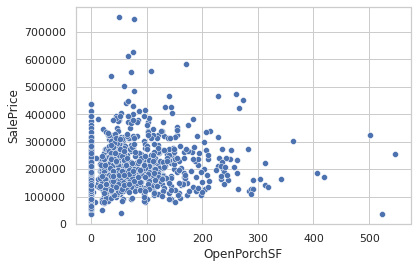

3.49337362309738e-35


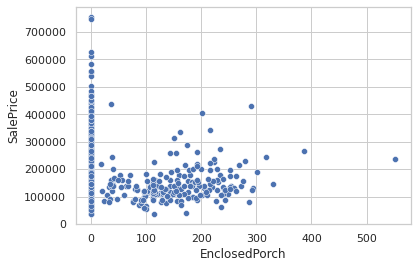

8.255770475119532e-07


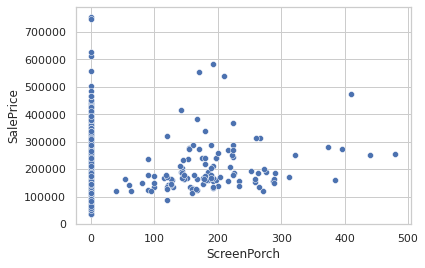

1.9721400194702135e-05


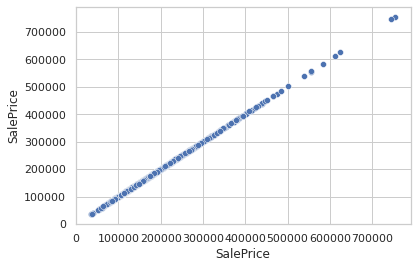

0.0


In [59]:

#
from scipy.stats import pearsonr

#
non_sig_list = []
data = train_df.copy()
for i in cont_variables:
  sns.scatterplot(x = train_df[i], y = train_df["SalePrice"])
  plt.show()
  # Running Pearson Correlation
  pearson_value = pearsonr(train_df[i], train_df["SalePrice"])[1]
  print(pearson_value)
  if pearson_value > .05:
    non_sig_list.append(i)


In [60]:

# non correlated feature
non_sig_list

['BsmtFinSF2']

In [61]:
# droping ['BsmtFinSF2']
train_df.drop(columns = 'BsmtFinSF2', inplace = True)

Running Anova using regression Analysis For categorical Variables

In [62]:

#
import statsmodels.api as sm

In [63]:

#For categorical Variables
data = train_df.copy()
Non_sig_features = []

# 
for i in cat_variables:
  X = pd.get_dummies(data[i])
  y = data['SalePrice']
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()
  predictions = model.predict(X) 
  p_value = model.f_pvalue

  #
  if p_value> .05:
    Non_sig_features.append(i)




In [64]:
Non_sig_features

['Street', 'Utilities', 'LandSlope', 'BsmtFinType2']

In [65]:
#droping Non sig features
train_df.drop(columns=Non_sig_features, inplace= True)

In [66]:
#For ordinal Variables
data = train_df.copy()
Non_sig_features = []

# 
for i in ordinal_data:
  X = pd.get_dummies(data[i])
  y = data['SalePrice']
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()
  predictions = model.predict(X) 
  p_value = model.f_pvalue

  #
  if p_value> .05:
    Non_sig_features.append(i)

In [67]:
Non_sig_features

['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold']

In [68]:
train_df.drop(columns= Non_sig_features, inplace = True)

In [69]:
# checking the shape of final dataset
train_df.shape

(1460, 66)

Feature Scaling

In [70]:
# For continues variables except sale price
excluded = ['SalePrice', 'BsmtFinSF2']
cont_column = [i for i in cont_variables if i not in excluded]

In [71]:

#
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

train_df[cont_column] = Scaler.fit_transform(train_df[cont_column])

In [72]:
#Categorical Columns
cat_columns = [i for i in train_df.select_dtypes("O").columns]
cat_columns

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [73]:
#
for i in cat_columns:
  train_df[i] = pd.get_dummies(train_df[i])


##Modeling

In [74]:
X = train_df.drop("SalePrice", axis = 1)
y = train_df["SalePrice"]

In [75]:
print(X.shape)
print(y.shape)

(1460, 65)
(1460,)


In [76]:
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
print(X_train.shape, y_train.shape)

(1168, 65) (1168,)


#**Multiple Linear regression**

In [78]:
# importing libraries
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [79]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_hat_ln = lm.predict(X_test)

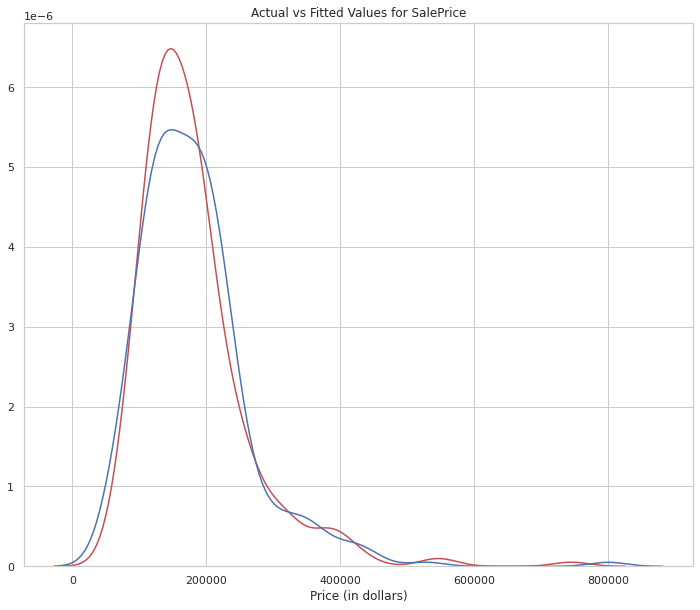

In [81]:

#Model Evaluation
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_ln, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for SalePrice')
plt.xlabel('Price (in dollars)')
plt.ylabel("")
#plt.savefig("day17.png")
#files.download("day17.png")

plt.show()



In [123]:
comp_df = pd.DataFrame({"Actual": y_test, "Predicted":  y_hat_ln})
comp_df.head()

Actual      Predicted
529  200624  238628.149230
491  133000  149909.673031
459  110000   91084.613652
279  192000  223324.278080
655   88000  101842.148872

In [83]:

# R^ 2 and mean square error
from sklearn.metrics import mean_squared_error

r_squared = lm.score(X_train, y_train)
print("R ^2 value is ", r_squared)
mse = mean_squared_error(y_test, y_hat_ln)
print("Mse is ", mse)

R ^2 value is  0.8803620676716782
Mse is  2285126947.5338125


#**For Test.csv**

In [84]:
test= pd.read_csv("test.csv")

In [85]:
test.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [86]:
len(test)

1459

In [87]:
test.shape

(1459, 80)

In [88]:
test_df = test.copy()

In [89]:
columns = X.columns

In [90]:
test_df = test_df[columns]

In [91]:
test_df.shape

(1459, 65)

In [92]:
test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          20       RH         80.0    11622      Reg         Lvl    Inside   
1          20       RL         81.0    14267      IR1         Lvl    Corner   
2          60       RL         74.0    13830      IR1         Lvl    Inside   
3          60       RL         78.0     9978      IR1         Lvl    Inside   
4         120       RL         43.0     5005      IR1         HLS    Inside   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0        NAmes      Feedr       Norm     1Fam     1Story            5   
1        NAmes       Norm       Norm     1Fam     1Story            6   
2      Gilbert       Norm       Norm     1Fam     2Story            5   
3      Gilbert       Norm       Norm     1Fam     2Story            6   
4      StoneBr       Norm       Norm   TwnhsE     1Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            6       1961          1961     Gable  CompShg     VinylSd   
1            6       1958          1958       Hip  CompShg     Wd Sdng   
2            5       1997          1998     Gable  CompShg     VinylSd   
3            6       1998          1998     Gable  CompShg     VinylSd   
4            5       1992          1992     Gable  CompShg     HdBoard   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd       None         0.0        TA        TA     CBlock       TA   
1     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA   
2     VinylSd       None         0.0        TA        TA      PConc       Gd   
3     VinylSd    BrkFace        20.0        TA        TA      PConc       TA   
4     HdBoard       None         0.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       TA           No          Rec       468.0      270.0        882.0   
1       TA           No          ALQ       923.0      406.0       1329.0   
2       TA           No          GLQ       791.0      137.0        928.0   
3       TA           No          GLQ       602.0      324.0        926.0   
4       TA           No          ALQ       263.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        TA          Y      SBrkr       896         0        896   
1    GasA        TA          Y      SBrkr      1329         0       1329   
2    GasA        Gd          Y      SBrkr       928       701       1629   
3    GasA        Ex          Y      SBrkr       926       678       1604   
4    GasA        Ex          Y      SBrkr      1280         0       1280   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         1         1             3             1          Gd   
2           0.0         2         1             3             1          TA   
3           0.0         2         1             3             1          Gd   
4           0.0         2         0             2             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0             5        Typ           0         NaN     Attchd       1961.0   
1             6        Typ           0         NaN     Attchd       1958.0   
2             6        Typ           1          TA     Attchd       1997.0   
3             7        Typ           1          Gd     Attchd       1998.0   
4             5        Typ           0         NaN     Attchd       1992.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          Unf         1.0       730.0         TA         TA          Y   
1          Unf         1.0       312.0         TA         TA          Y   
2          Fin         2.0       482.0         TA         TA          Y   
3    

In [93]:
null_df = test_df.isnull().sum()[test_df.isnull().sum() > 0].sort_values(ascending = False).reset_index()
null_df

index    0
0    FireplaceQu  730
1    LotFrontage  227
2     GarageQual   78
3   GarageFinish   78
4    GarageYrBlt   78
5     GarageCond   78
6     GarageType   76
7       BsmtCond   45
8   BsmtExposure   44
9       BsmtQual   44
10  BsmtFinType1   42
11    MasVnrType   16
12    MasVnrArea   15
13      MSZoning    4
14  BsmtFullBath    2
15    Functional    2
16   Exterior2nd    1
17   Exterior1st    1
18      SaleType    1
19    BsmtFinSF1    1
20     BsmtUnfSF    1
21   KitchenQual    1
22    GarageCars    1
23    GarageArea    1
24   TotalBsmtSF    1

In [94]:
null_df_list = null_df["index"].values.tolist()

In [95]:
null_df_list

['FireplaceQu',
 'LotFrontage',
 'GarageQual',
 'GarageFinish',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'BsmtFullBath',
 'Functional',
 'Exterior2nd',
 'Exterior1st',
 'SaleType',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF']

In [96]:

null_obj_list = [i for i in null_df_list if test_df[i].dtype == "O"]
null_obj_list

['FireplaceQu',
 'GarageQual',
 'GarageFinish',
 'GarageCond',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrType',
 'MSZoning',
 'Functional',
 'Exterior2nd',
 'Exterior1st',
 'SaleType',
 'KitchenQual']

In [97]:
null_year_list = [i for i in null_df_list if "Yr" in i or "Year" in i]
null_year_list

['GarageYrBlt']

In [98]:
null_ordinal_list = [i for i in null_df_list if test_df[i].nunique() < 50 and i not in null_obj_list]
null_ordinal_list

['BsmtFullBath', 'GarageCars']

In [100]:
null_quant_list = [i for i in null_df_list if i not in null_obj_list and i not in null_year_list and i not in null_ordinal_list]
null_quant_list

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea',
 'TotalBsmtSF']

In [101]:
mode_dict_cat = {}
#l = len(null_obj_list)
for i in null_obj_list:
  mode_dict_cat[i] = test_df[i].value_counts().idxmax()
mode_dict_cat

{'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'GLQ',
 'BsmtQual': 'TA',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'FireplaceQu': 'Gd',
 'Functional': 'Typ',
 'GarageCond': 'TA',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageType': 'Attchd',
 'KitchenQual': 'TA',
 'MSZoning': 'RL',
 'MasVnrType': 'None',
 'SaleType': 'WD'}

In [102]:
mode_ordinal_dict = {}
#l = len(null_obj_list)
for i in null_ordinal_list:
  mode_ordinal_dict[i] = test_df[i].value_counts().idxmax()
mode_ordinal_dict

{'BsmtFullBath': 0.0, 'GarageCars': 2.0}

In [103]:
mode_year_dict = {}
#l = len(null_obj_list)
for i in null_year_list:
  mode_year_dict[i] = test_df[i].value_counts().idxmax()
mode_year_dict

{'GarageYrBlt': 2005.0}

In [104]:
# Creating a dictionory for mean values
mean_dict = {}
for i in null_quant_list:
  mean_dict[i] = test_df[i].mean()
mean_dict

{'BsmtFinSF1': 439.2037037037037,
 'BsmtUnfSF': 554.2949245541838,
 'GarageArea': 472.76886145404666,
 'LotFrontage': 68.58035714285714,
 'MasVnrArea': 100.70914127423822,
 'TotalBsmtSF': 1046.1179698216736}

In [105]:
null_quant_keys = list(mean_dict.keys())

In [106]:
# Imputing null quant values
def imputation(data):
  test_df[data].replace(np.nan, mean_dict[data], inplace = True)
  return test_df[data].isnull().sum()


In [107]:
for i in null_quant_list:
  print(imputation(i))



0
0
0
0
0
0


In [108]:
# Function for categorical values 
def imputation(data):
  test_df[data].replace(np.nan, mode_dict_cat[data], inplace = True)
  return test_df[data].isnull().sum()


In [109]:
# Imputing categrorical values
for i in null_obj_list:
  imputation(i)

In [110]:
# Function for filling year values 
def imputation(data):
  test_df[data].replace(np.nan, mode_year_dict[data], inplace = True)
  return test_df[data].isnull().sum()


In [111]:
for i in null_year_list:
  imputation(i)

In [112]:
# Function for filling ordinal values 
def imputation(data):
  test_df[data].replace(np.nan, mode_ordinal_dict[data], inplace = True)
  return test_df[data].isnull().sum

In [113]:
for i in null_ordinal_list:
  imputation(i)

In [114]:
#Checking for total null values
test_df.isnull().sum().sum()

0

All Null Values Cleared

In [120]:
# Predicting the values
y_test_hat = lm.predict(test_df)

In [121]:
test["Predicted_price"] = y_test_hat

In [122]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

##** END **

#**THANK YOU**